In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
us_chronic_resp_disease=pd.read_csv("data/us_chronic_resp_disease.csv")

In [6]:
# #get new data for validation (currently not consisitent with the given data)
# resp_new=[]
# with open(r'D:\datathon\2021\resp_new.txt') as S:
#     resp_new=S.readlines()
# resp_new=list(map(lambda x:x.replace('\n',''),resp_new))
# chronic_resp_new=np.array(resp_new,dtype=str)
# chronic_resp_new=chronic_resp_new.reshape([-1,11])
# chronic_resp_new=pd.DataFrame(chronic_resp_new,columns=['Death','location_name','sex','Age-standardized',
#                                                         'cause_name','All risk factors','Rate','year_id',
#                                                         'mx','lower','upper'])
# chronic_resp_new.mx=chronic_resp_new['mx'].astype('float')
# us_chronic_location_new=chronic_resp_new.groupby('location_name')

In [12]:
# # state=list(chronic_resp_new.location_name.unique())
# us_chronic_resp_disease_use=us_chronic_resp_disease[list(map(lambda x: x in state, 
#                                                              us_chronic_resp_disease.location_name))]

In [13]:
# us_chronic_resp_disease_use

In [14]:
#for plot
def plot_mx_by_year(resp, compare=True, ax = None):
    if compare:
        resp = resp[['year_id','sex', 'mx']].loc[resp['sex'].isin({'Male', 'Female','Both'})]
    else:
        resp = resp[['year_id','sex', 'mx']].loc[resp['sex'].isin({'Both'})]
    year_mx = resp.groupby(['year_id', 'sex']).mean().reset_index()
    if ax is not None:
        return sns.lineplot(x='year_id', y='mx', hue='sex', data=year_mx, ax=ax)
    return sns.lineplot(x='year_id', y='mx', hue='sex', data=year_mx)

def plot_mx_year_by_cause(resp, causes, compare = True):
    nrows, ncols = 3, 4
    if len(causes) > 10:
        return -1
    if compare:
        resp = resp.loc[resp['sex'].isin({'Male', 'Female','Both'})]
    else:
        resp = resp.loc[resp['sex'].isin({'Both'})]
    if not isinstance(list(causes),list):
        print('argument not a list')
        causes = [causes]
    cause_groups = resp.groupby('cause_name')
    fig = plt.figure(figsize = (16,9))
    
    for i, cause in enumerate(causes):
        ax = plt.subplot(nrows, ncols, i+1)
        ax.set_title(f"MR of {cause}")
        subgroup = cause_groups.get_group(cause)
        plot_mx_by_year(cause_groups.get_group(cause), compare, ax = ax)
    plt.tight_layout()
    return fig

<ipython-input-6-afff62263e58>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (16,9))


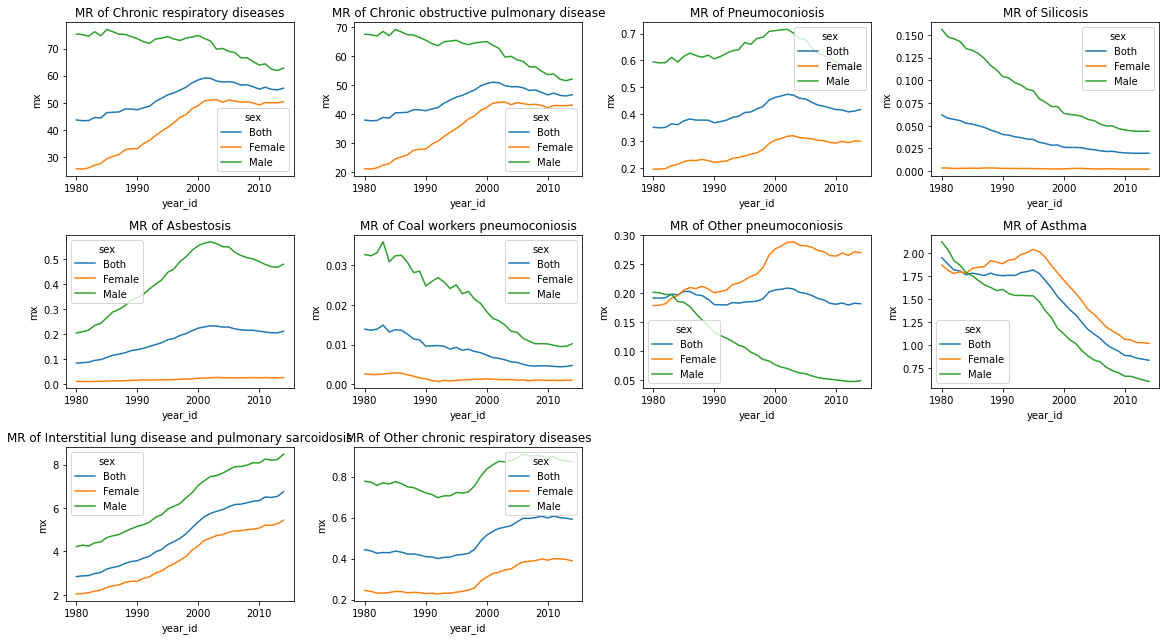

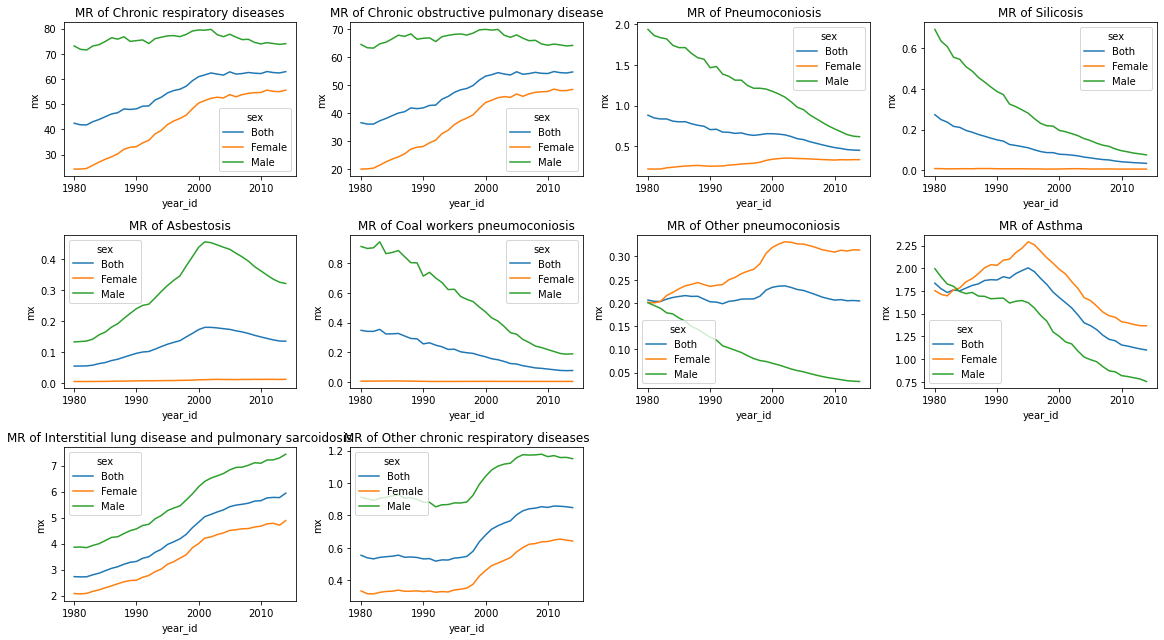

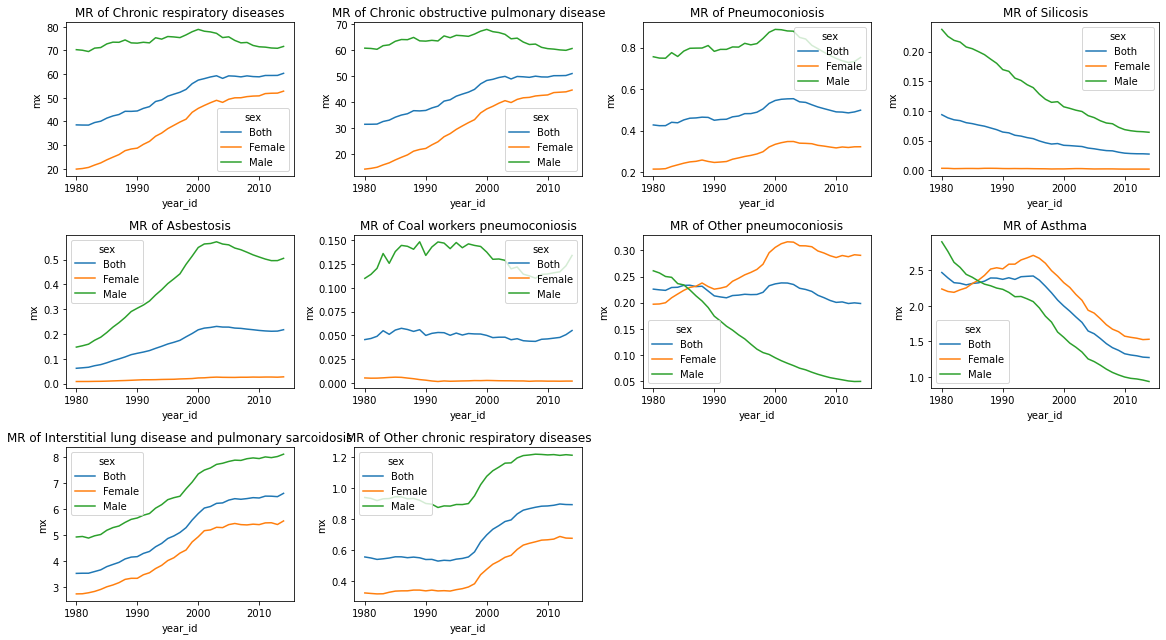

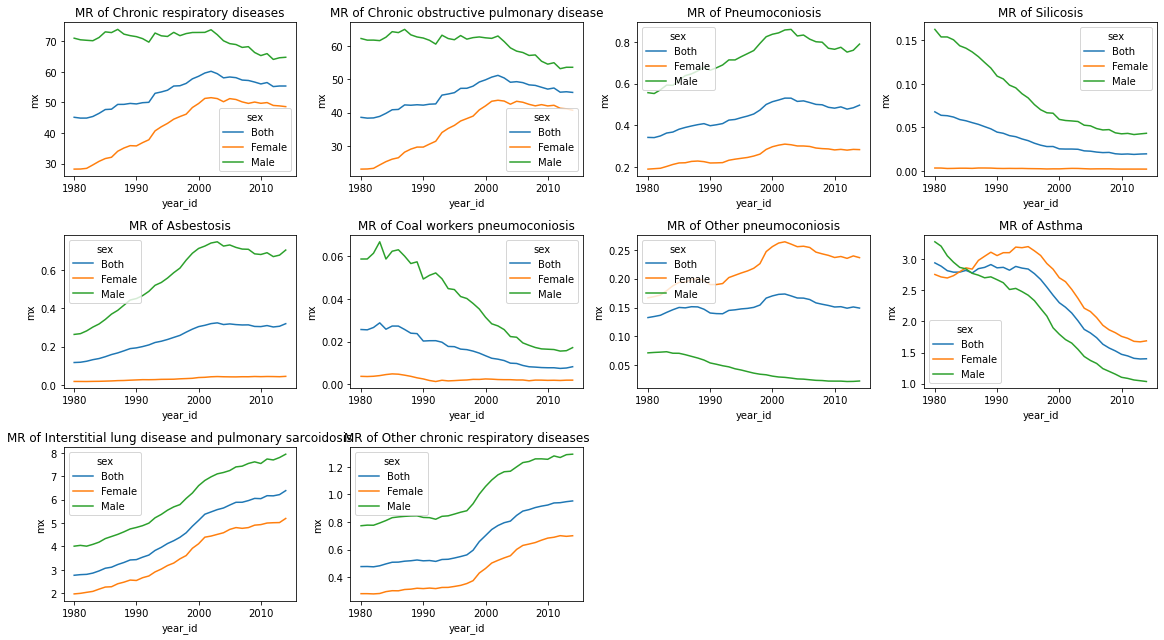

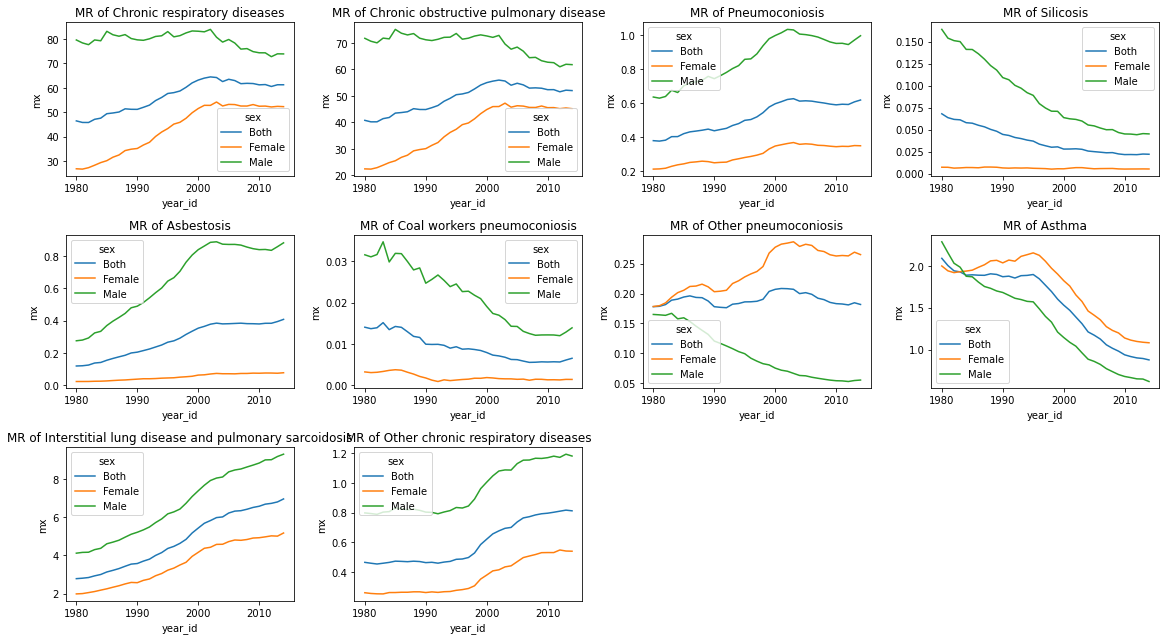

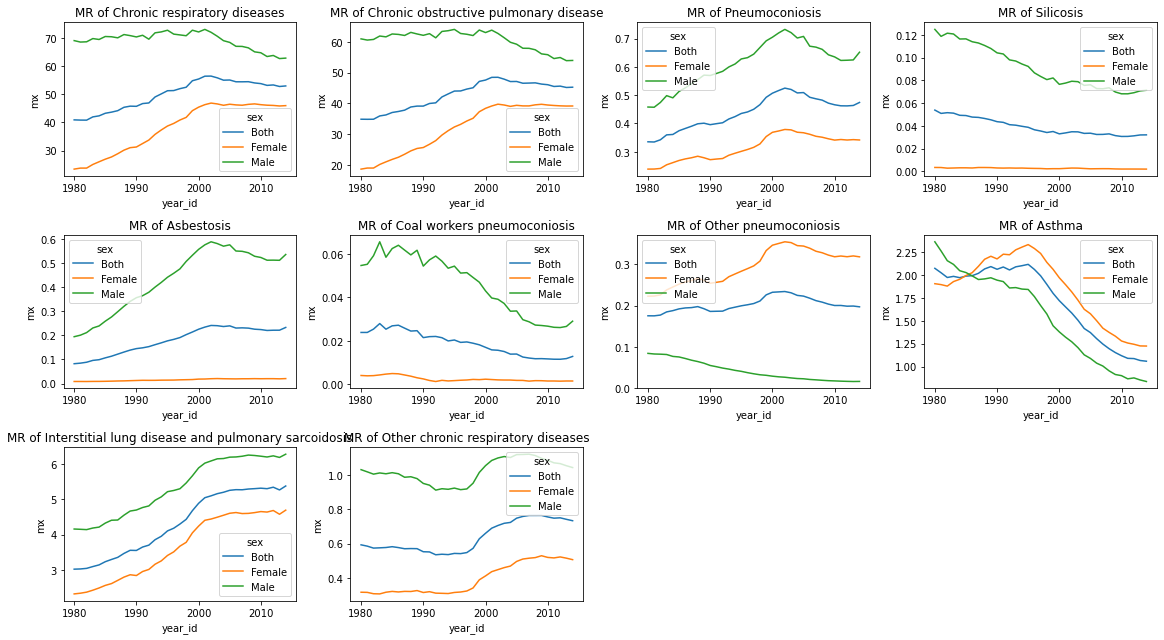

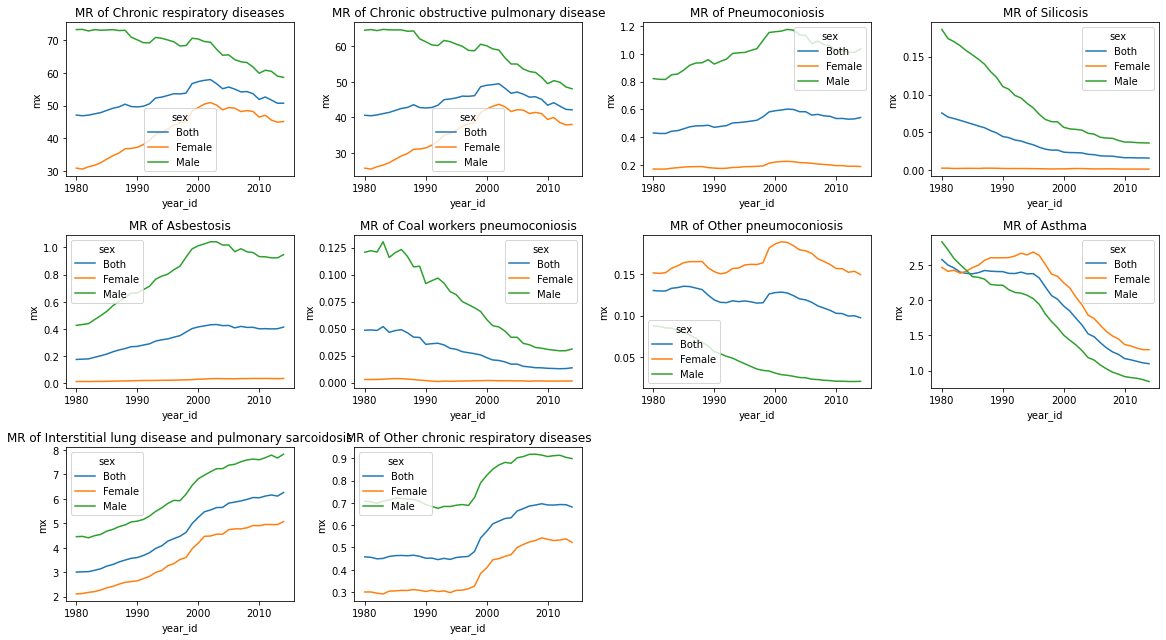

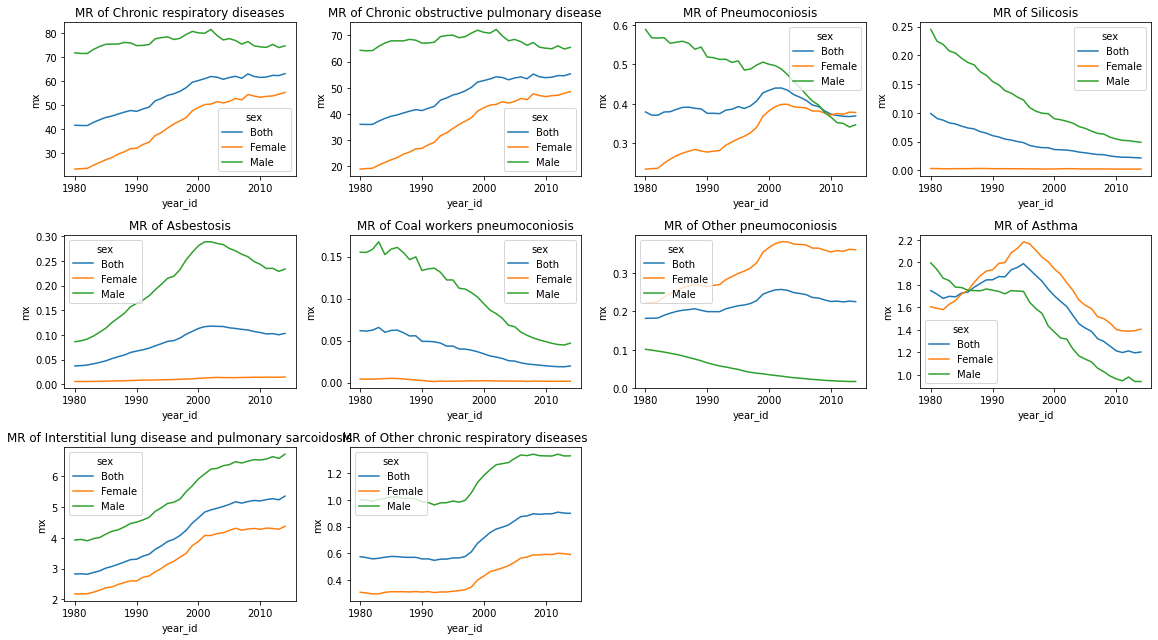

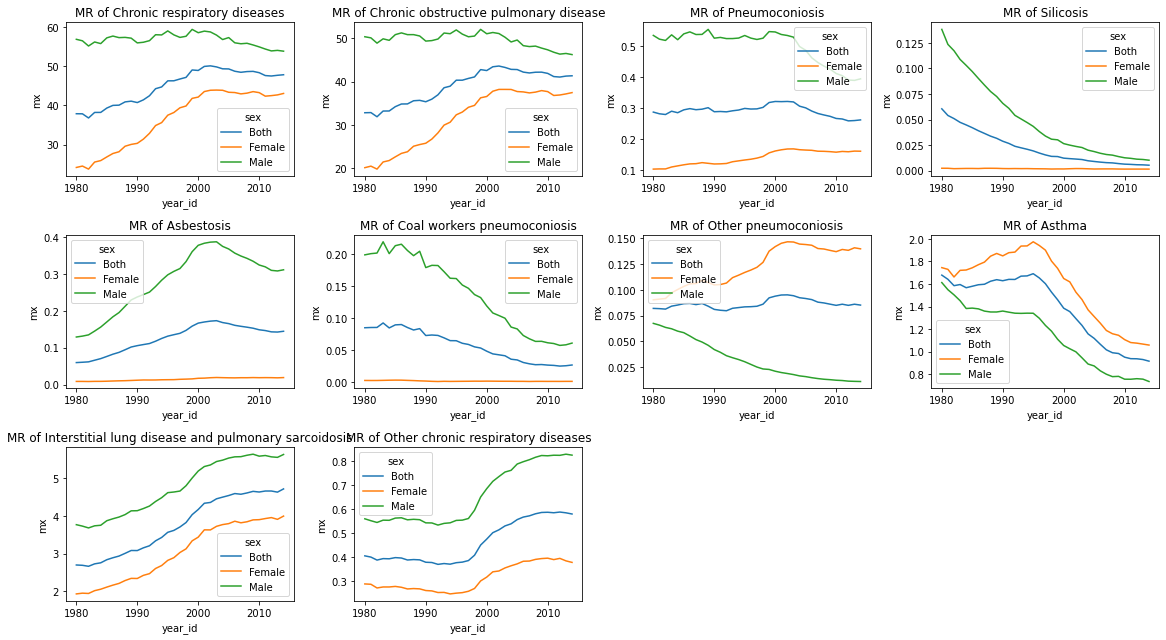

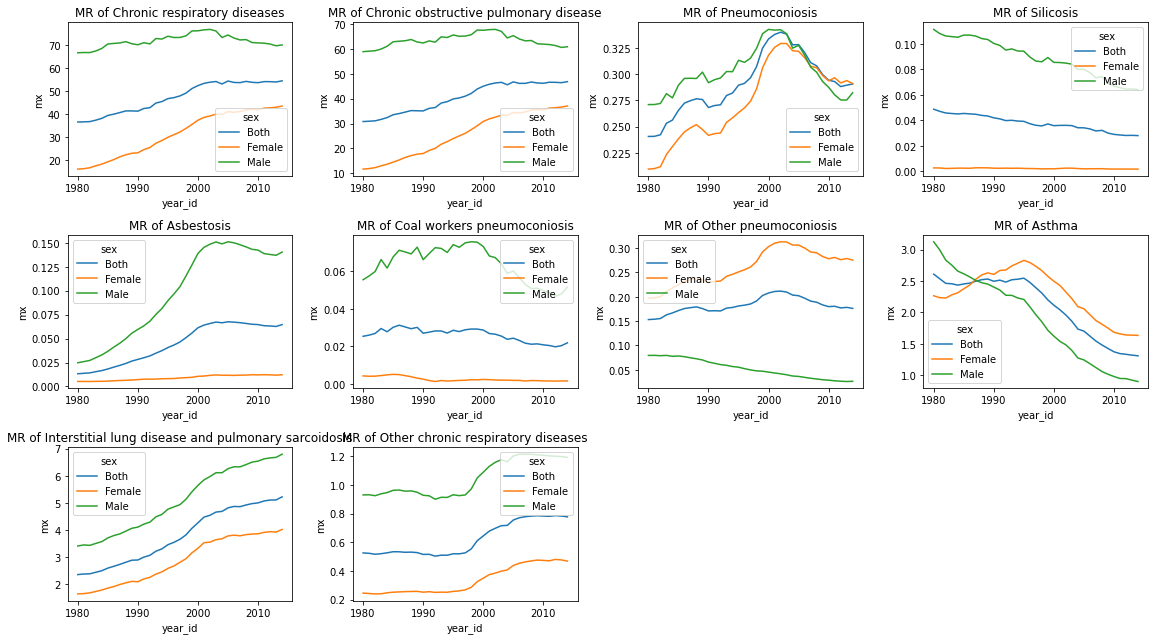

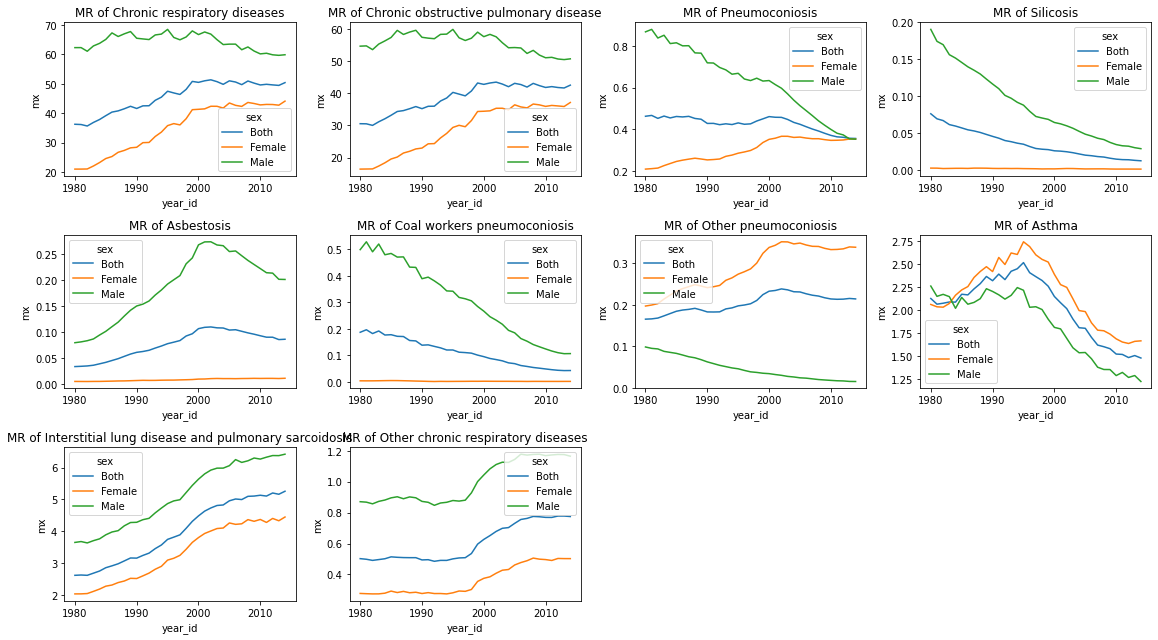

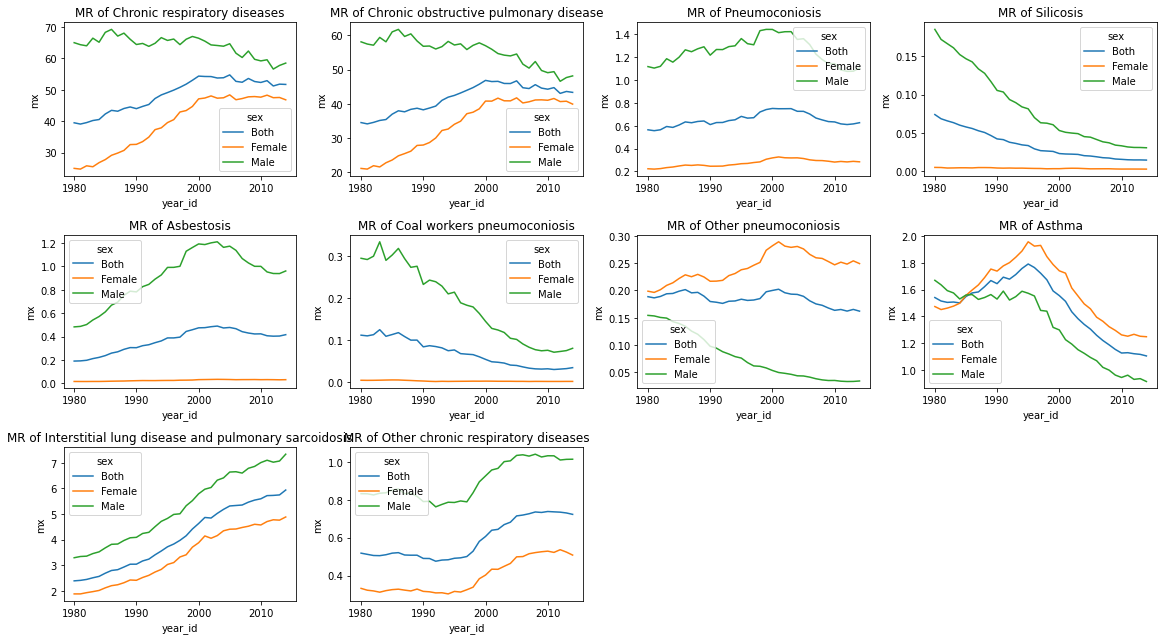

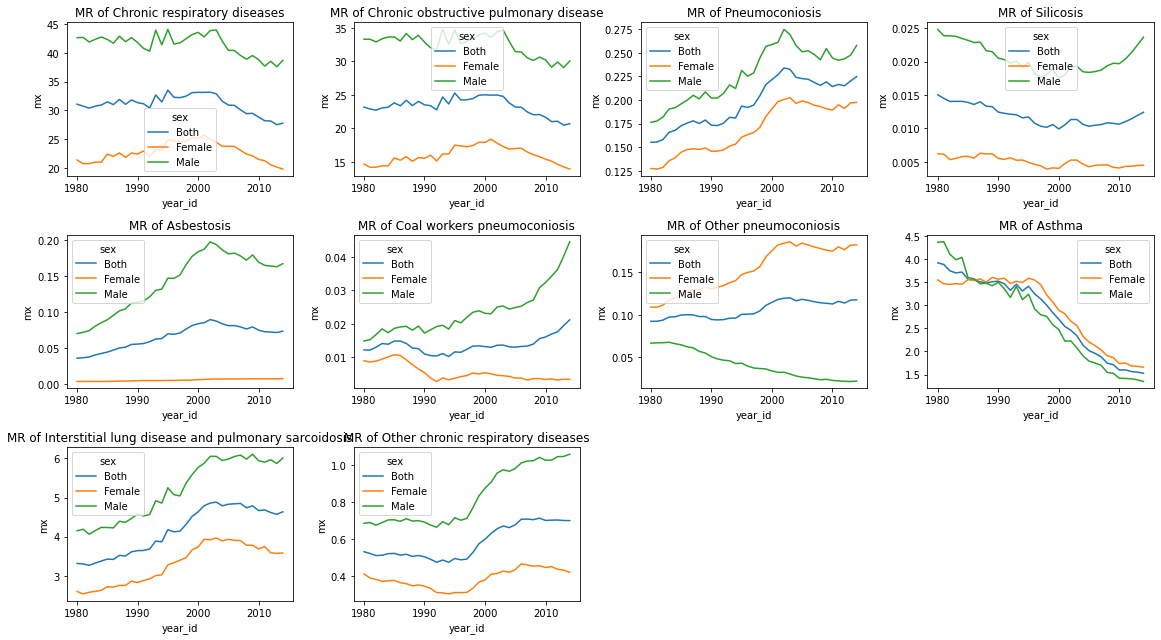

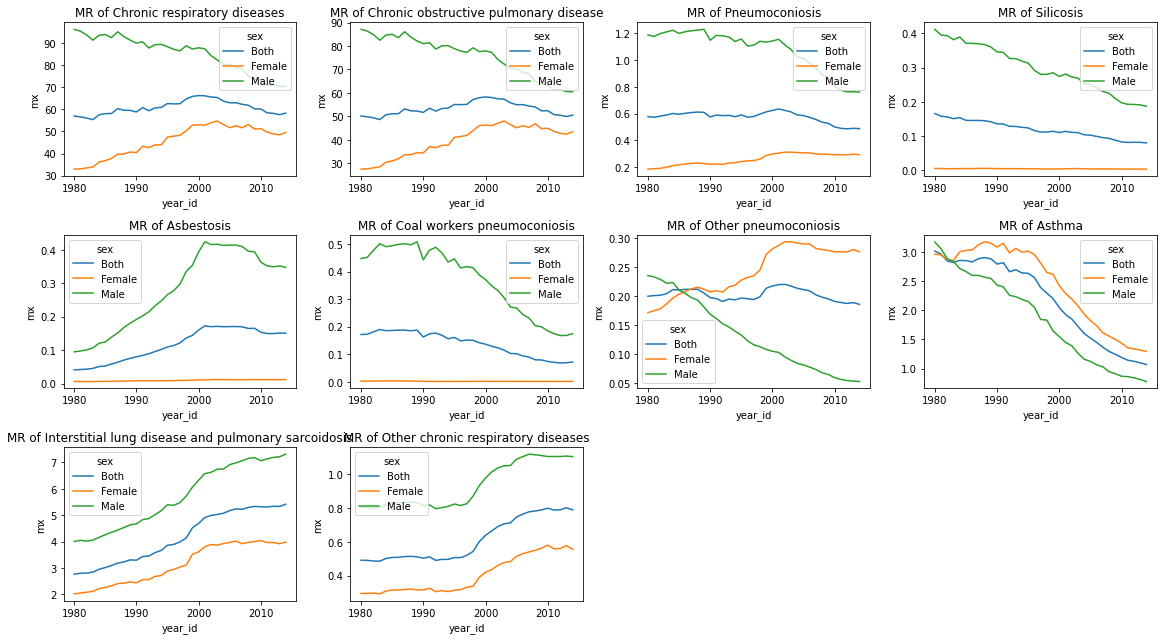

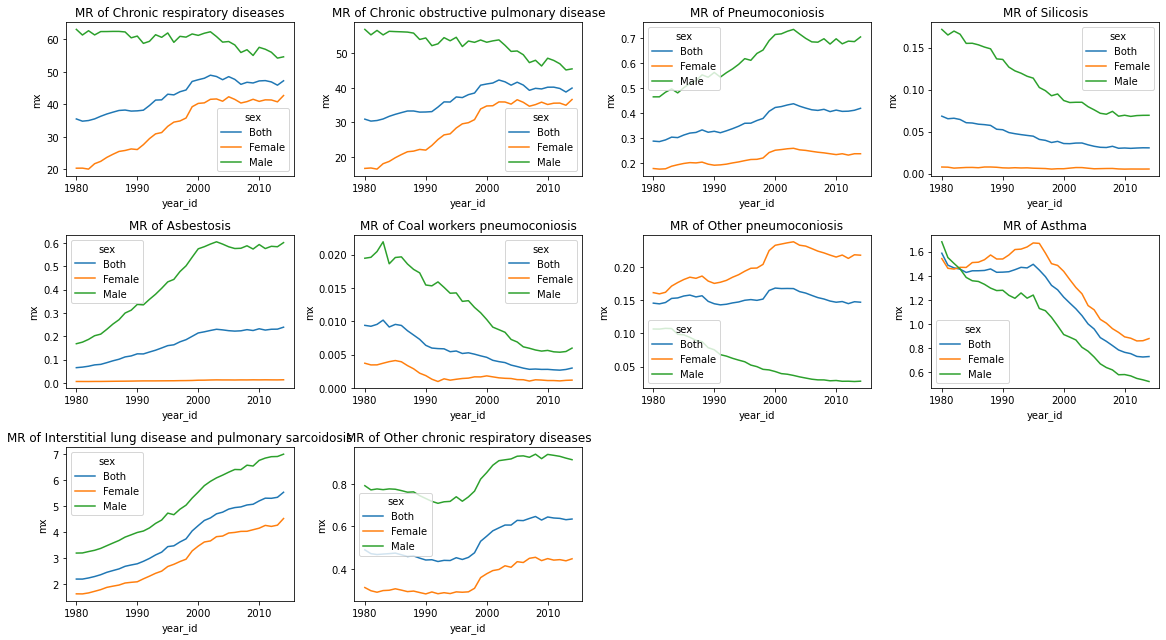

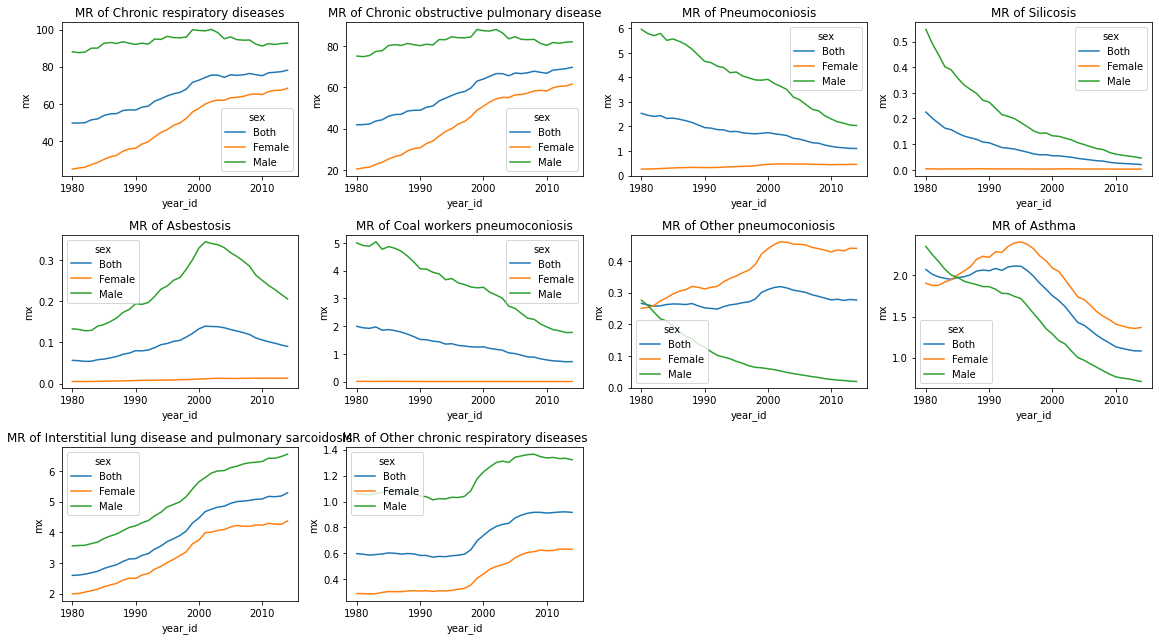

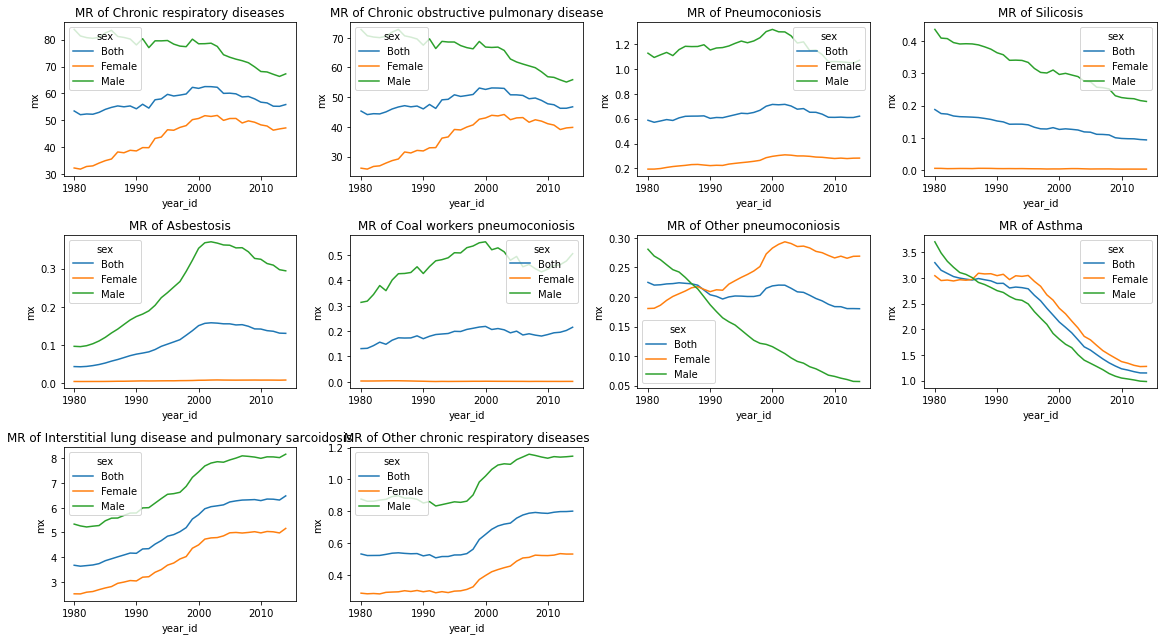

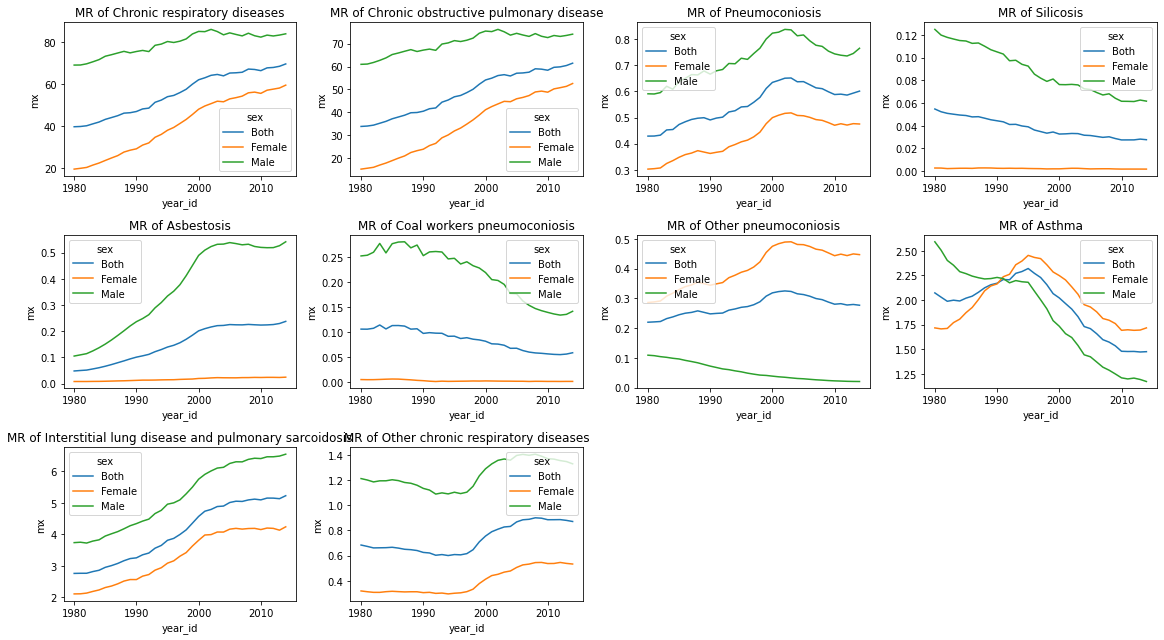

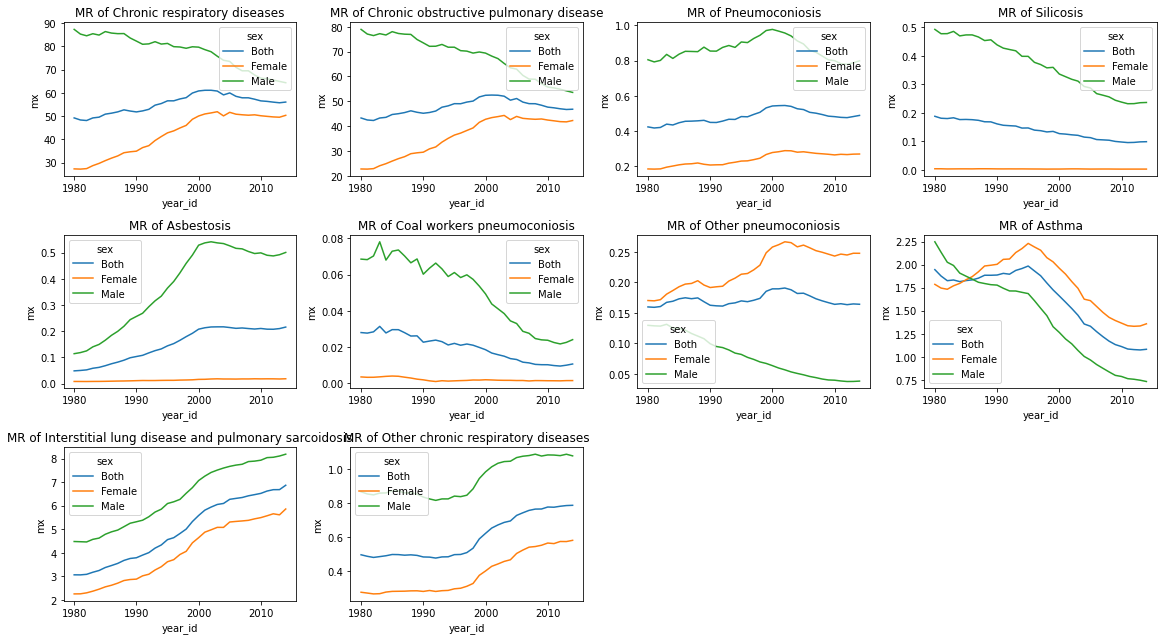

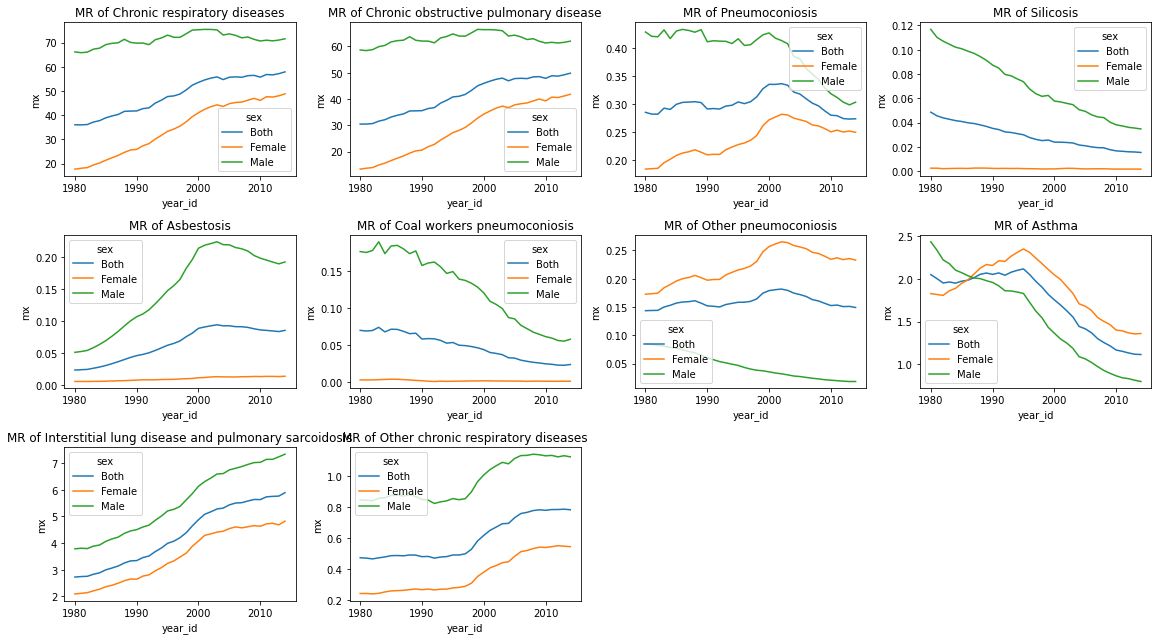

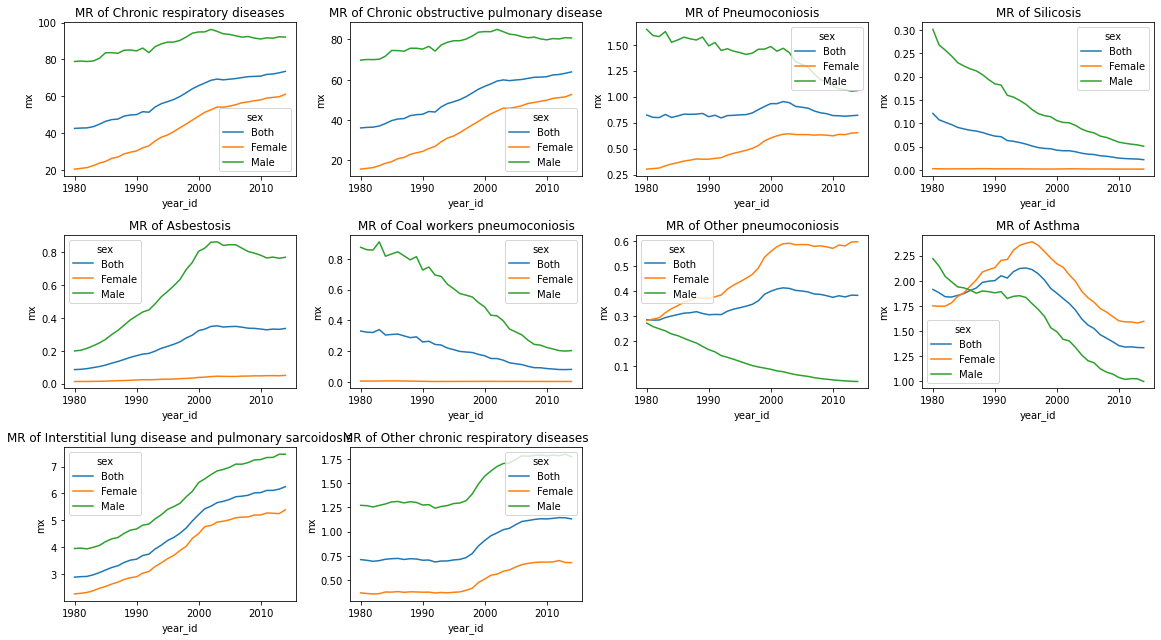

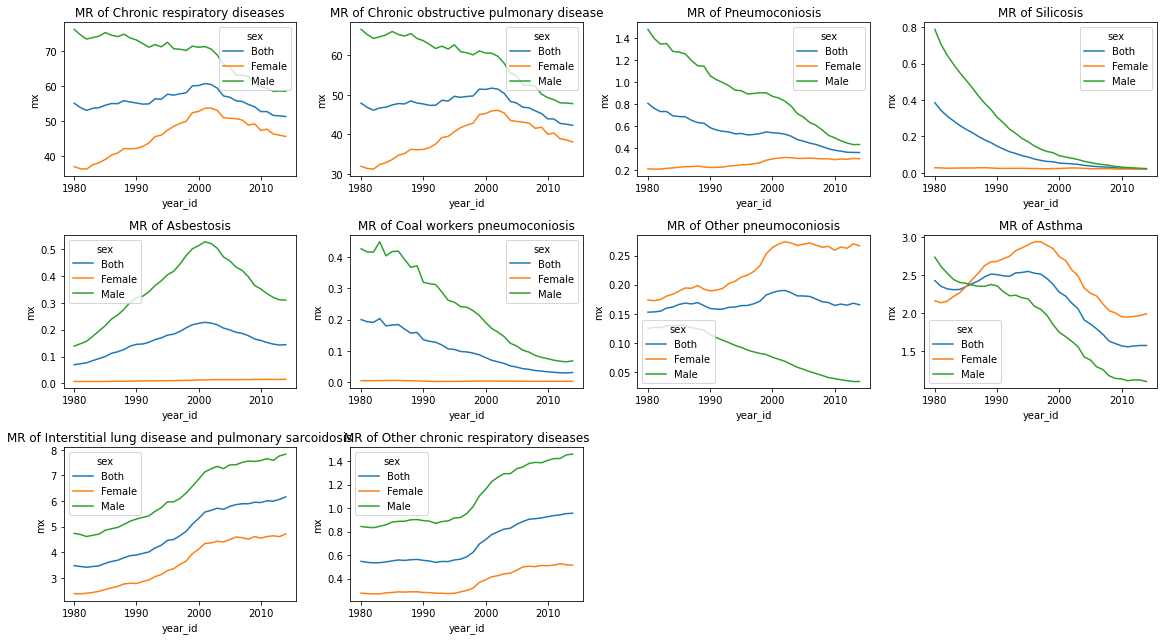

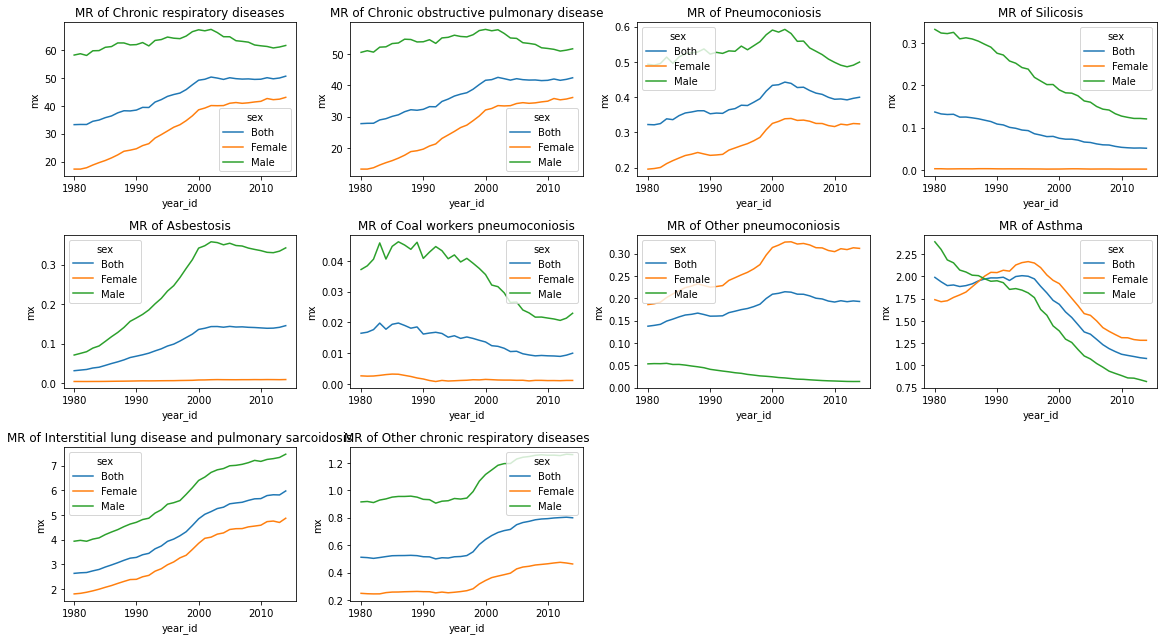

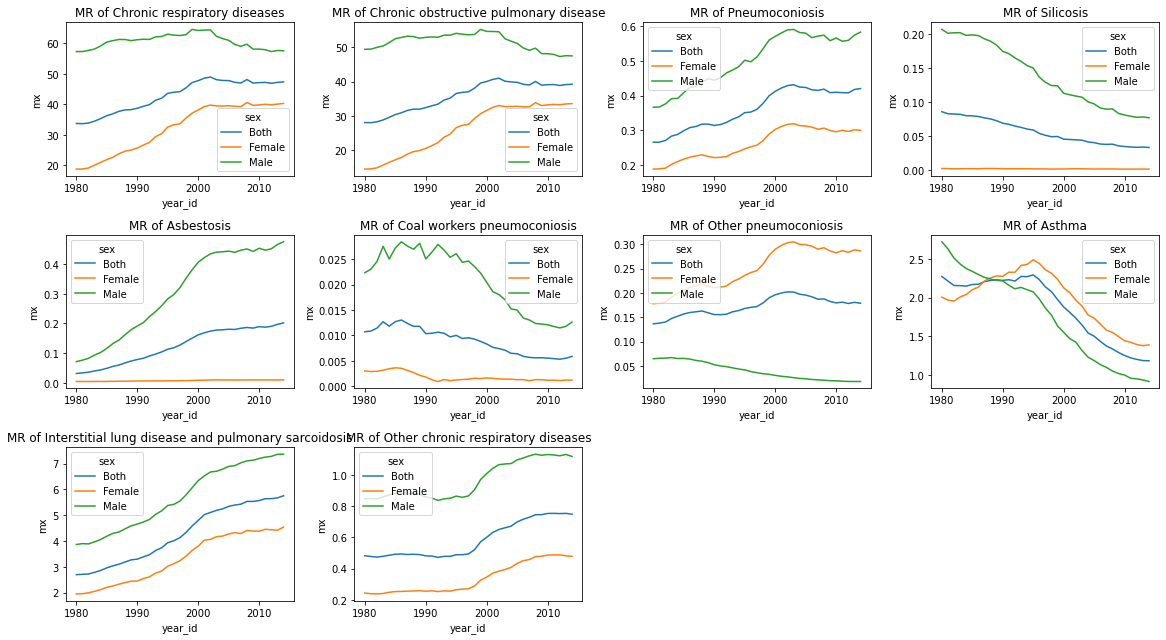

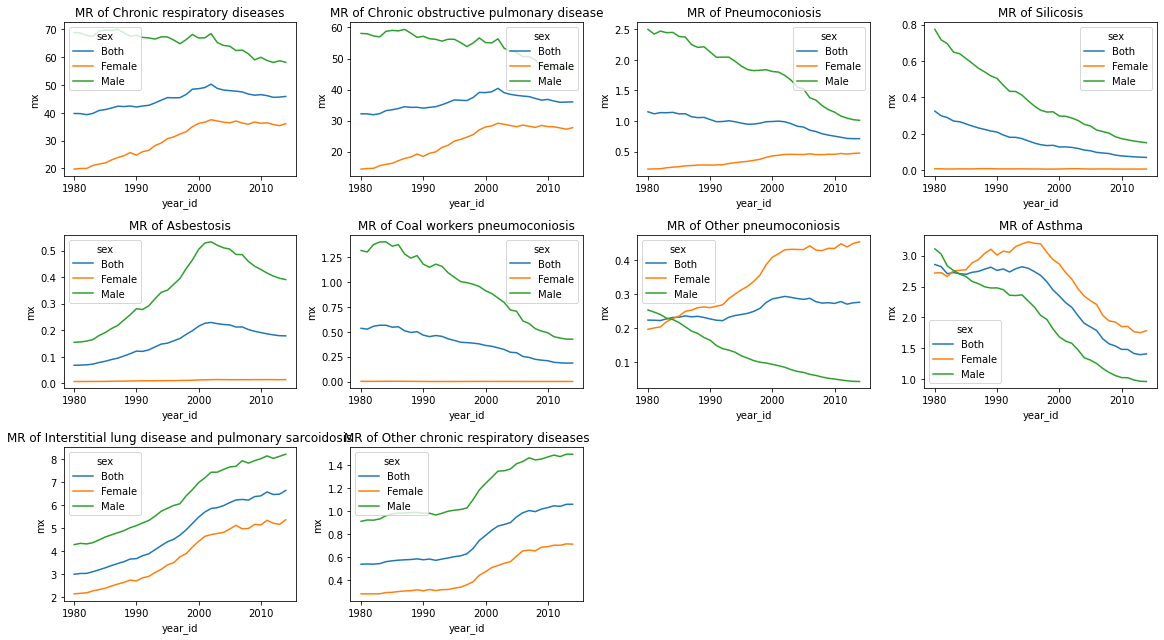

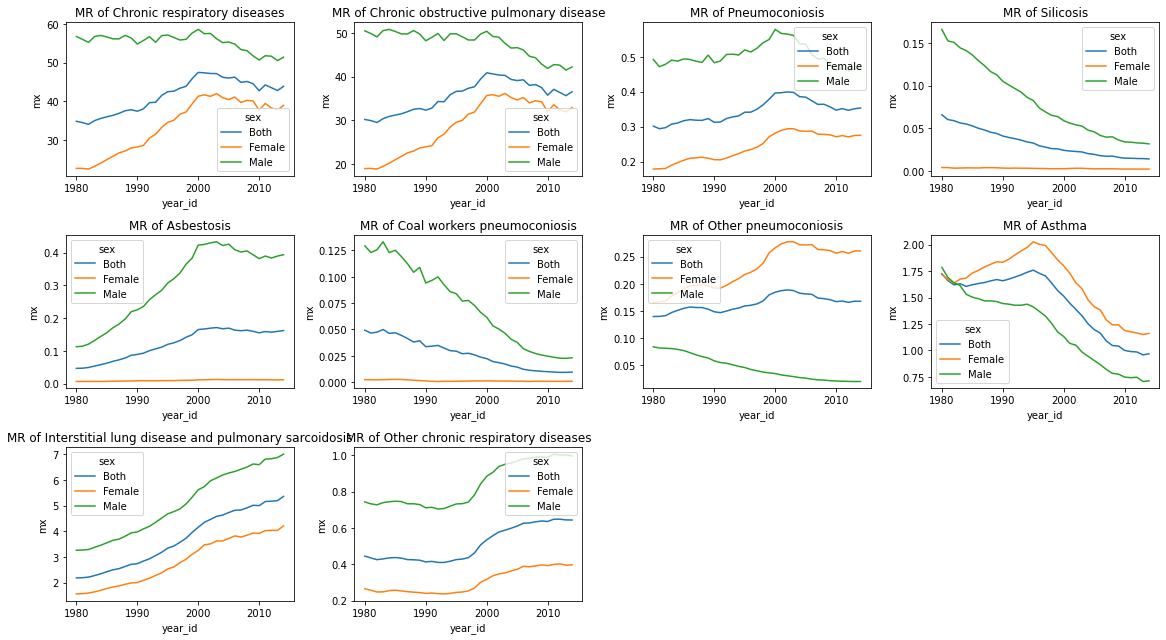

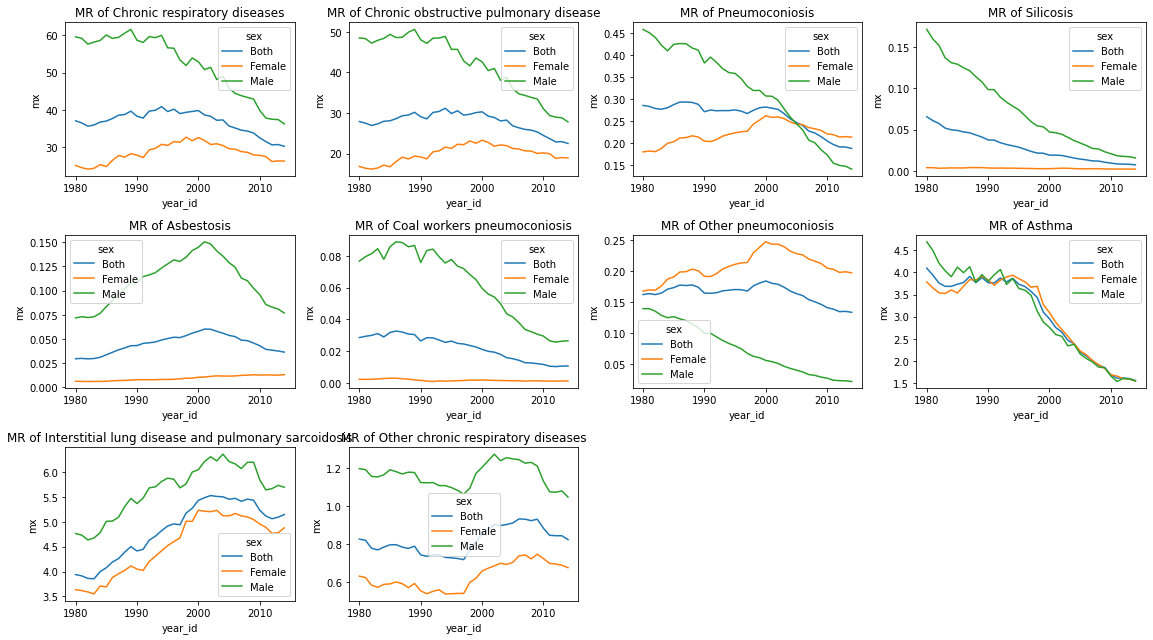

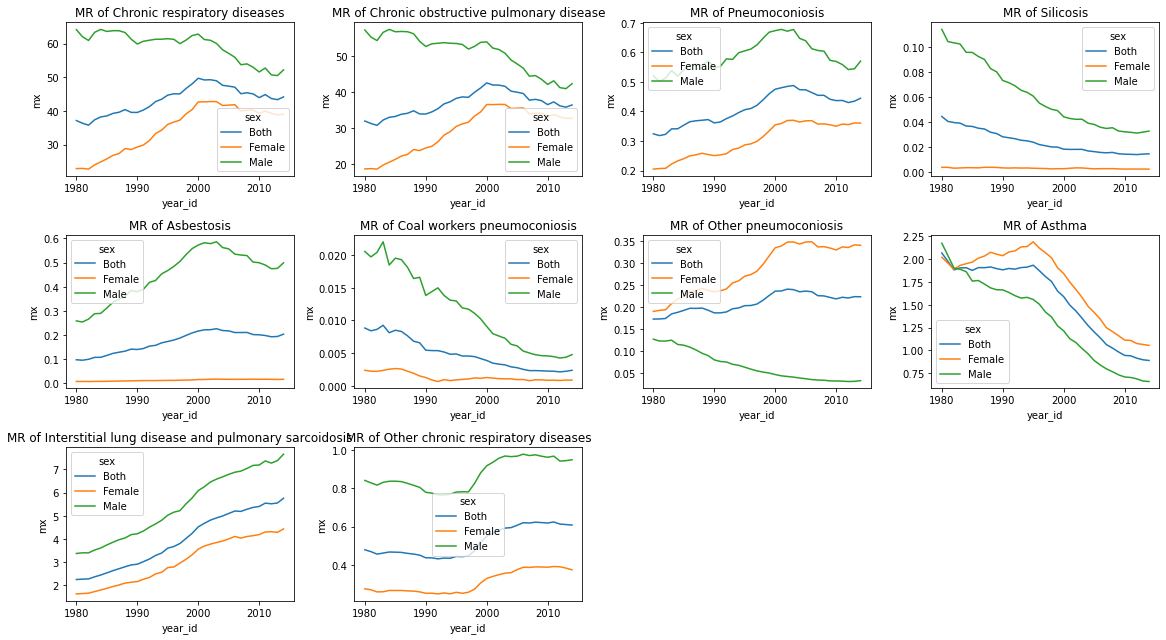

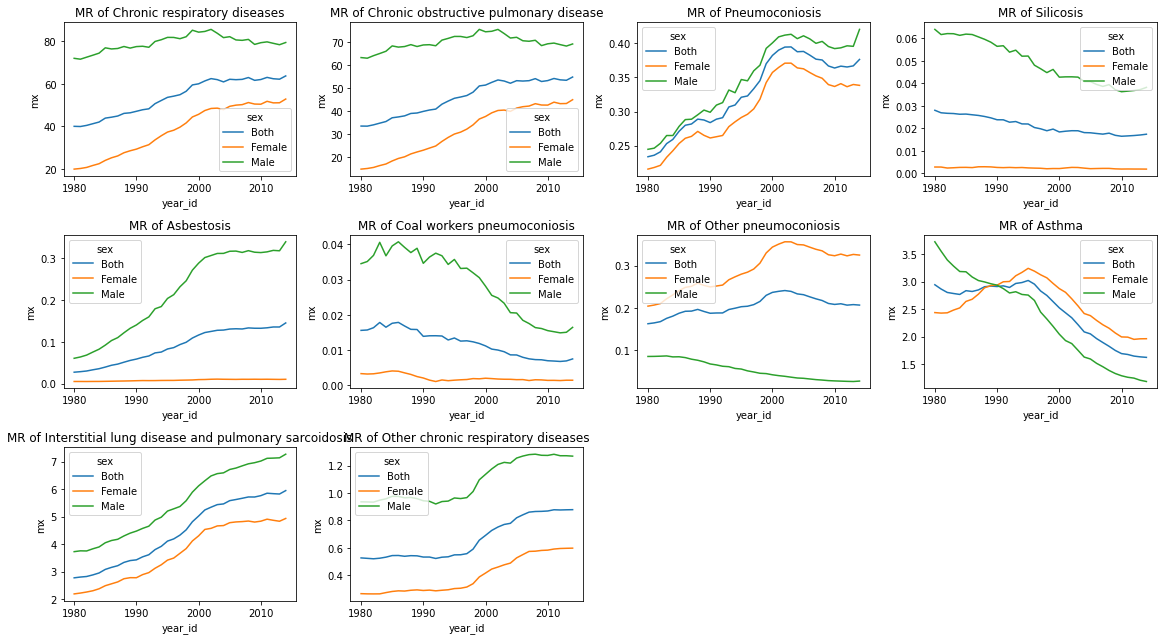

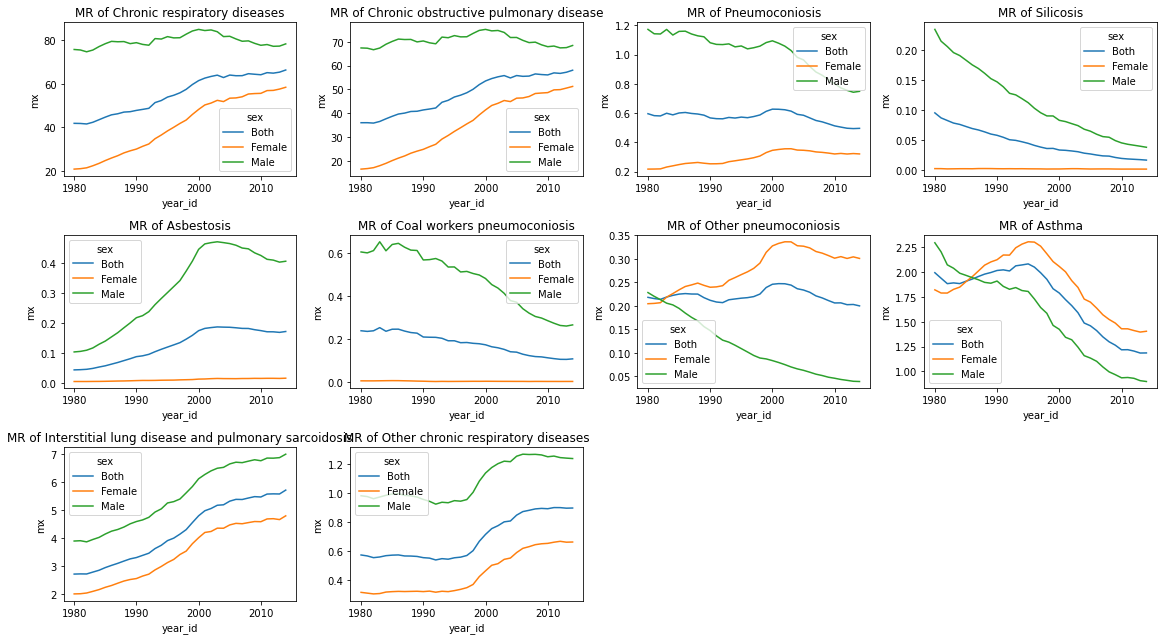

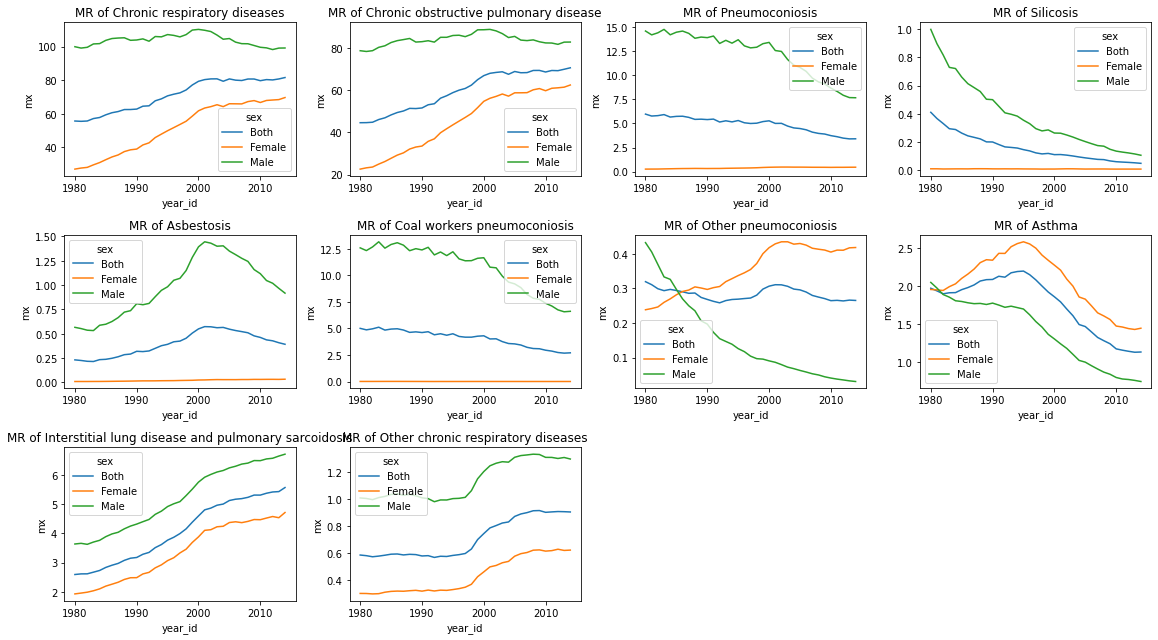

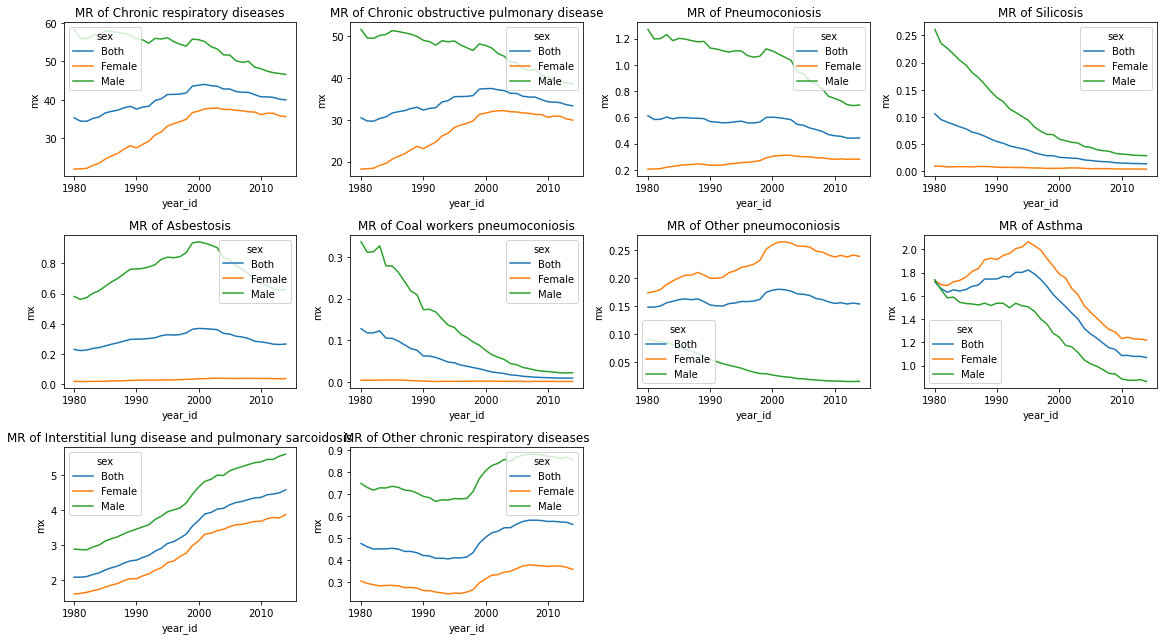

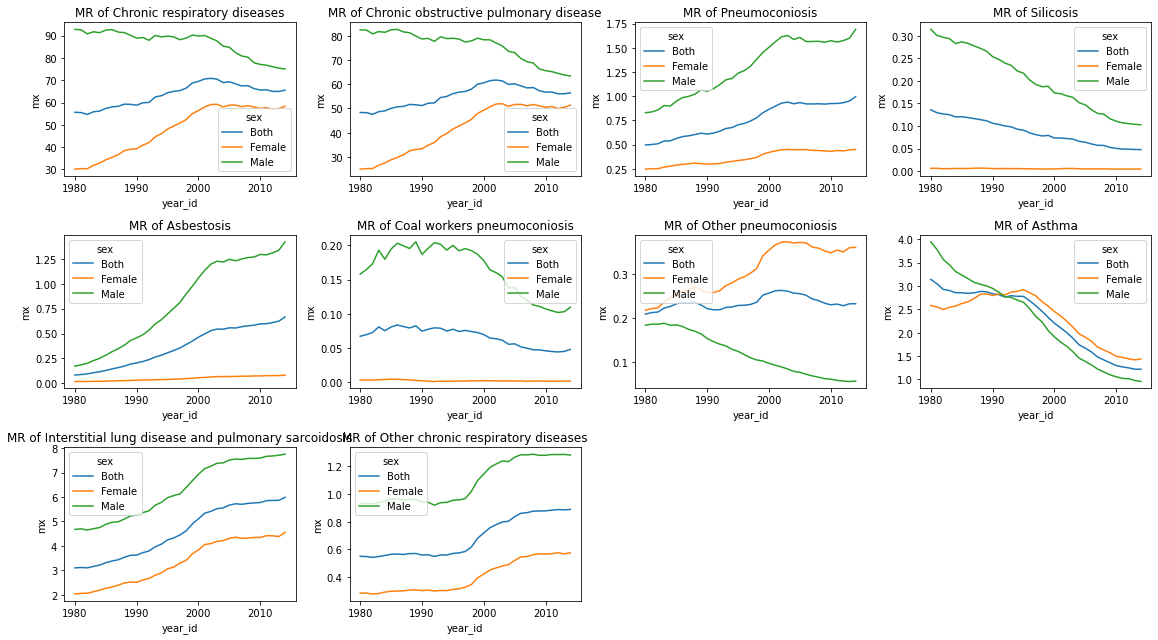

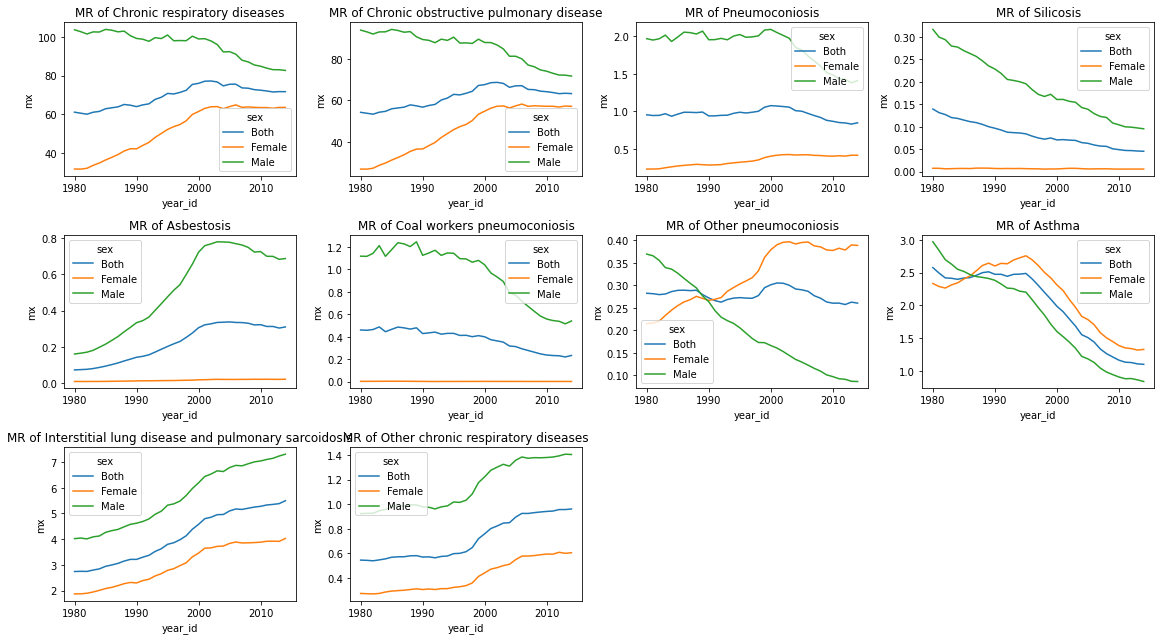

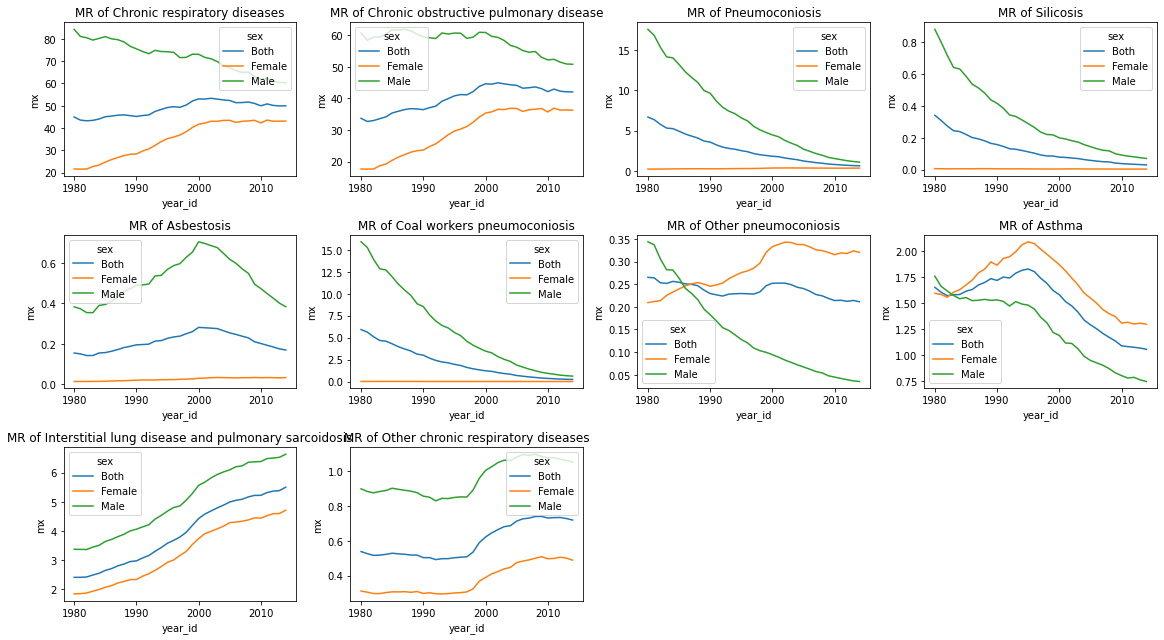

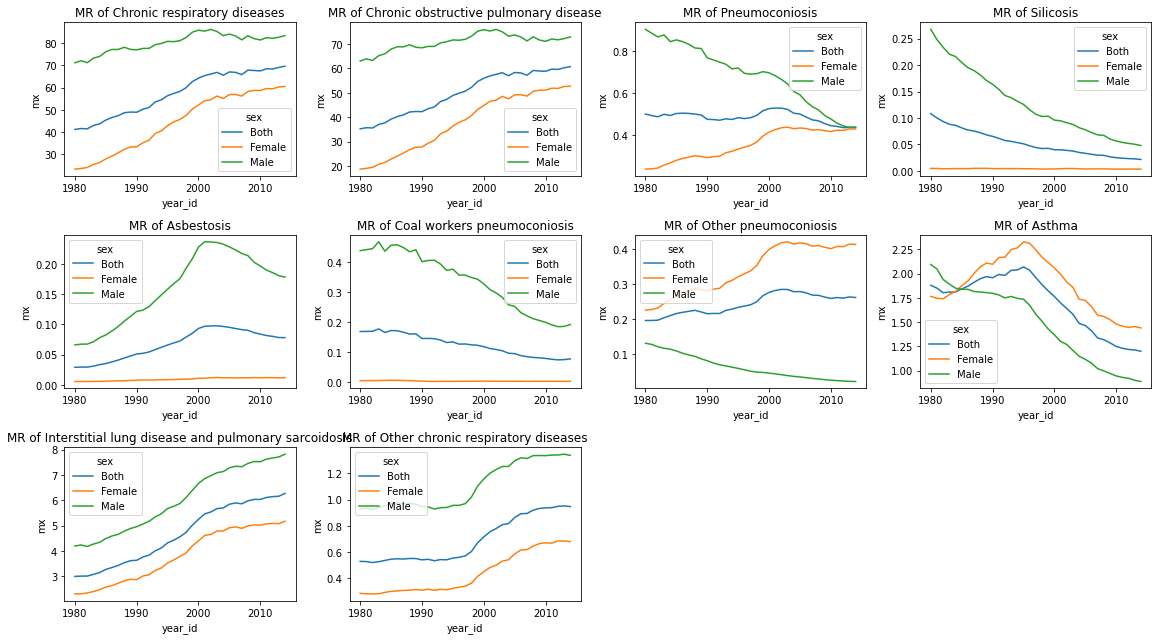

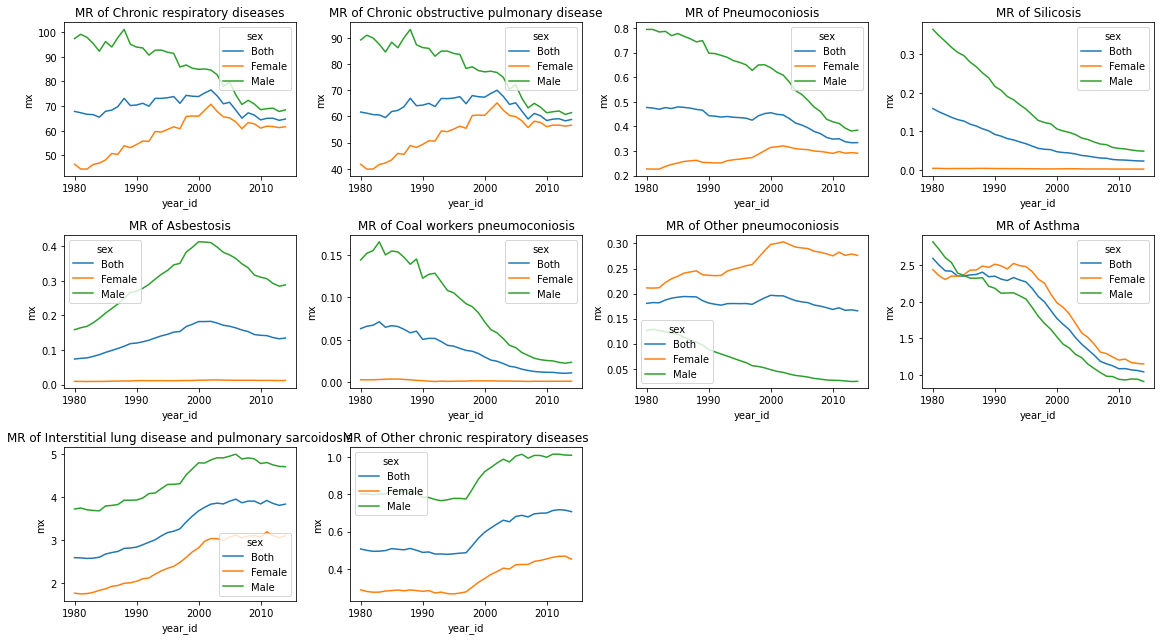

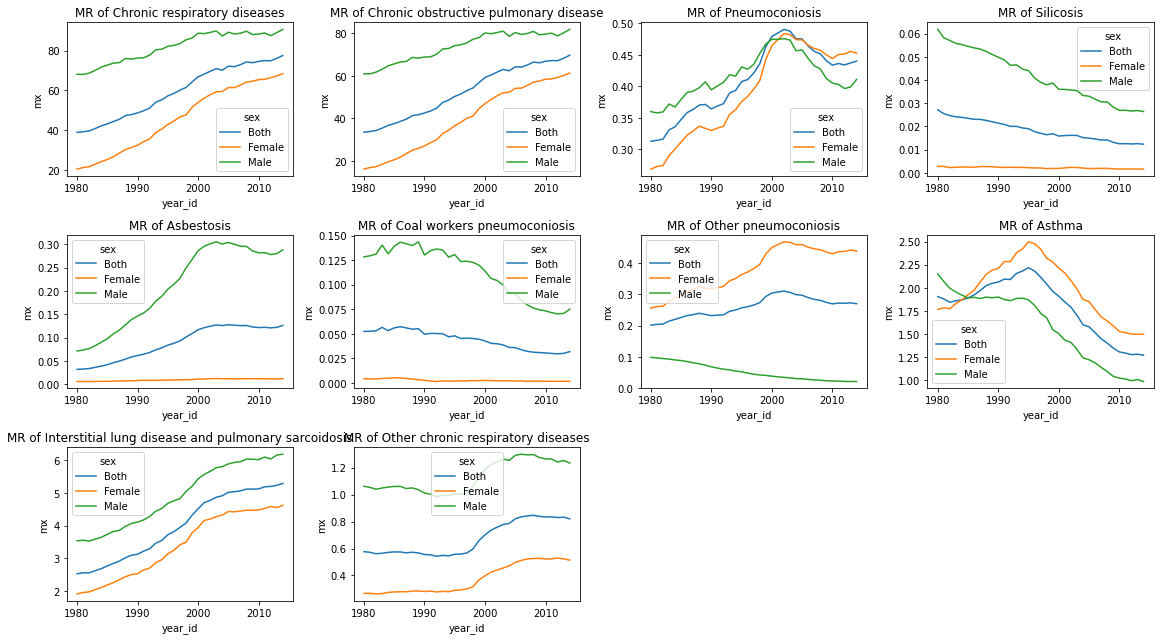

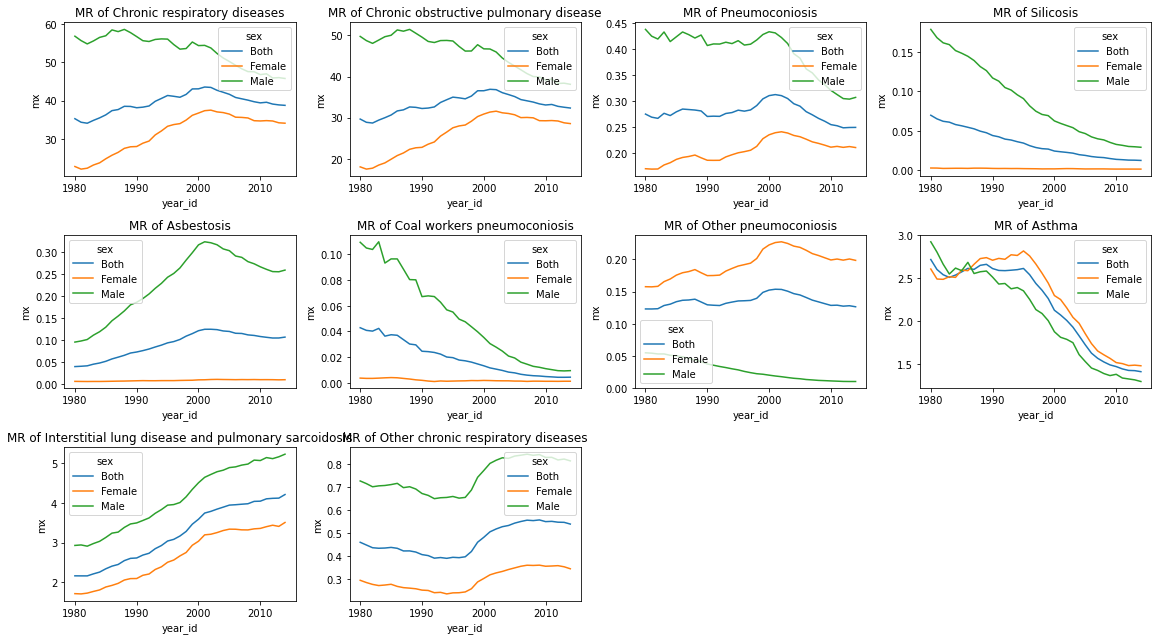

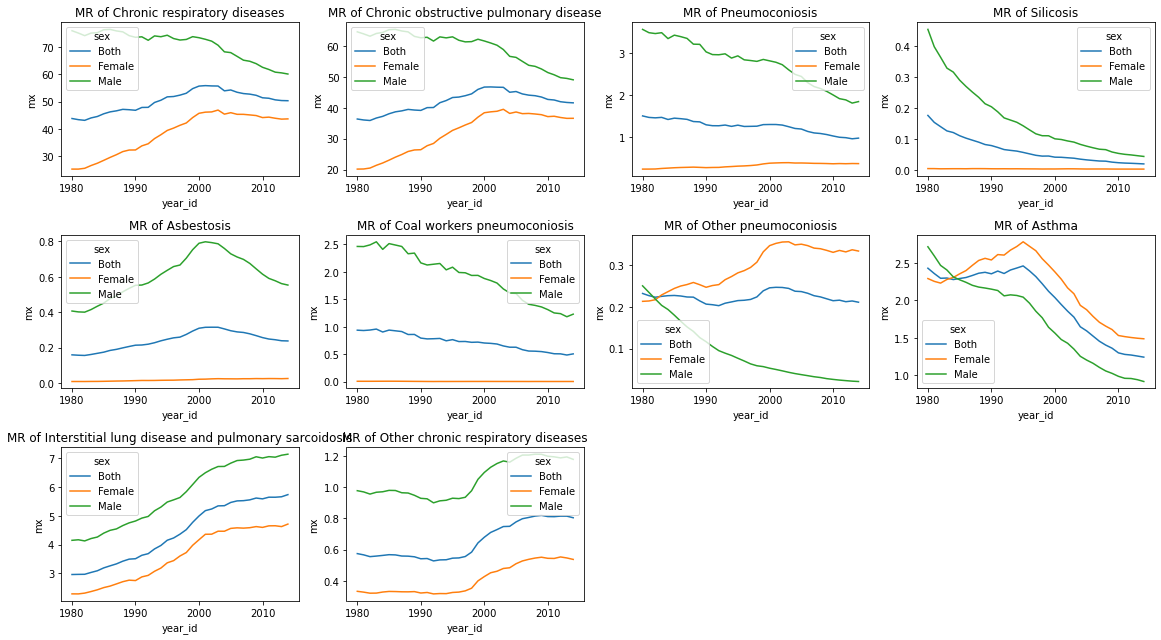

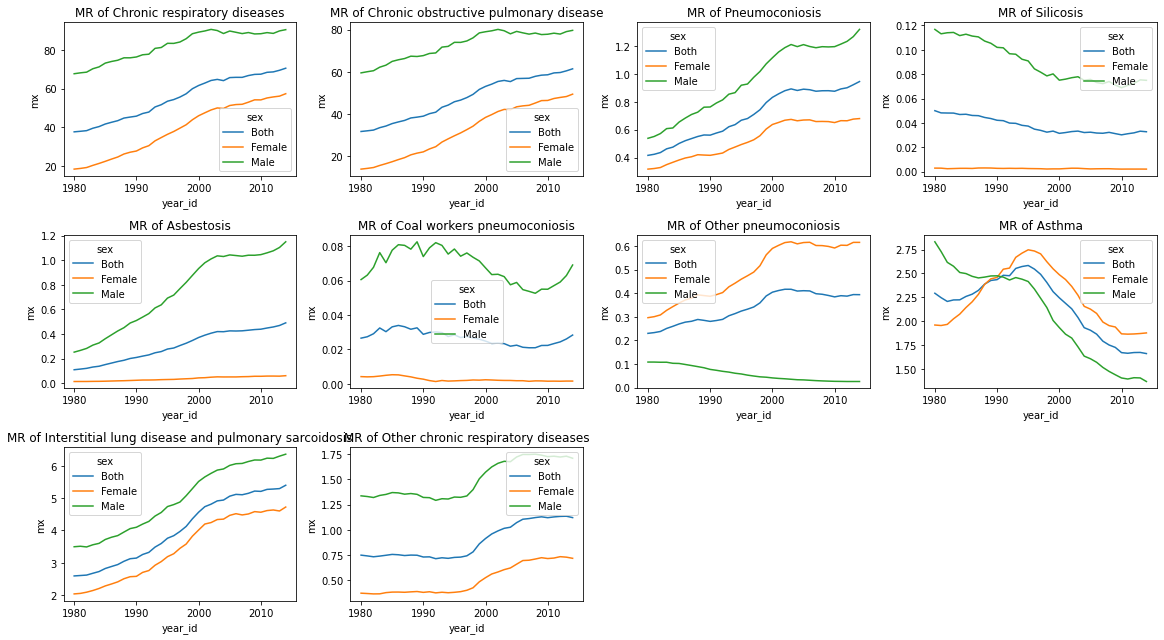

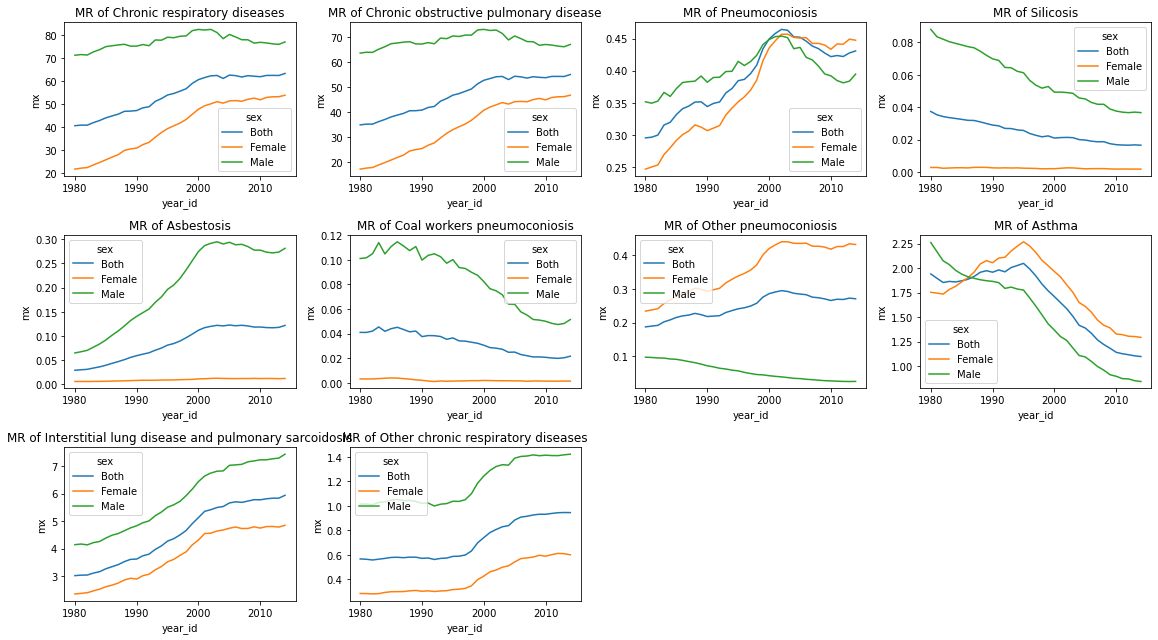

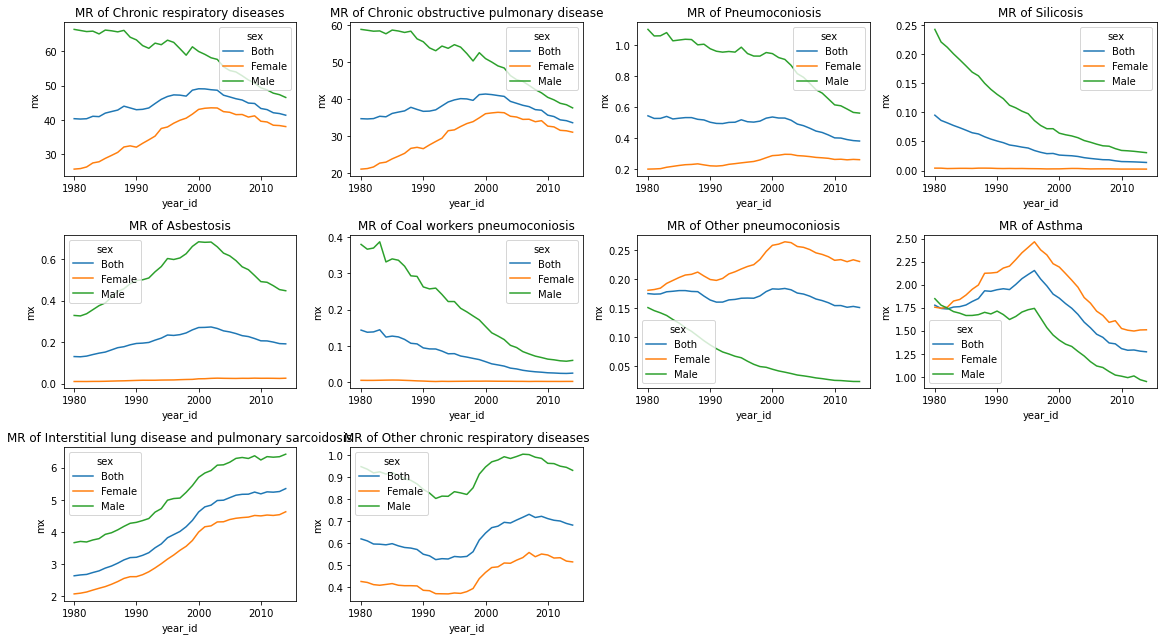

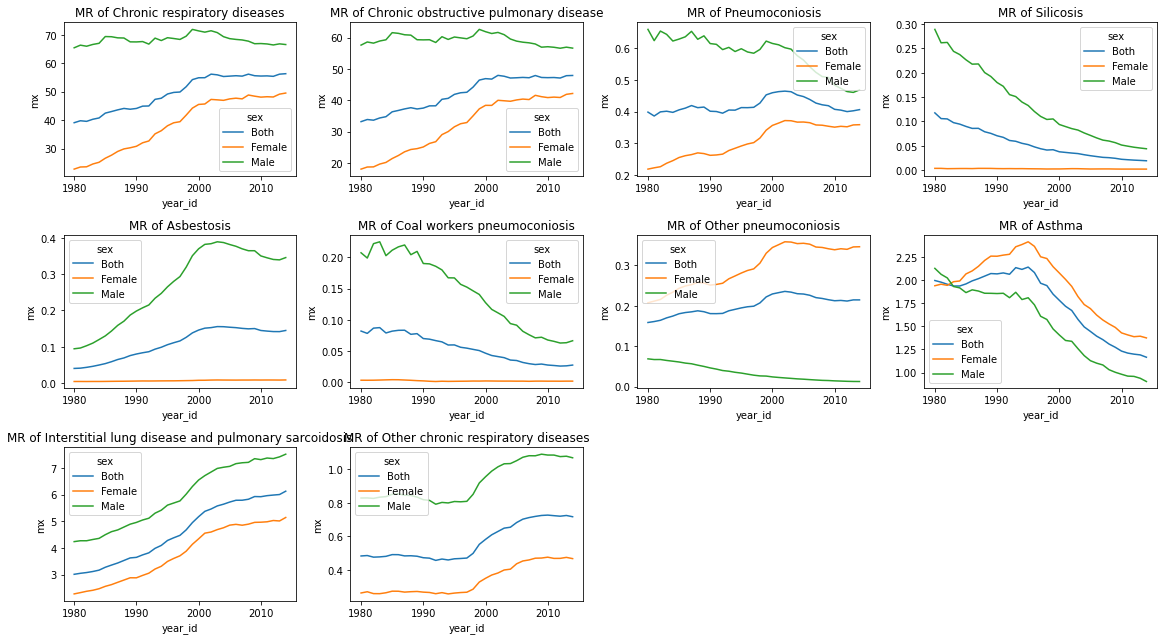

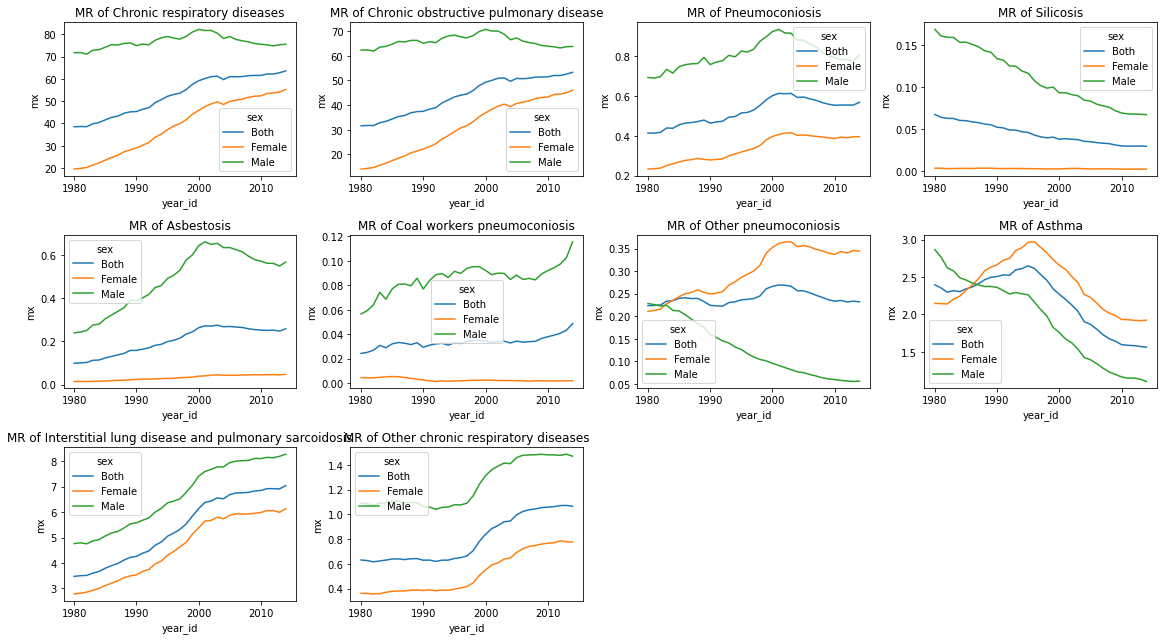

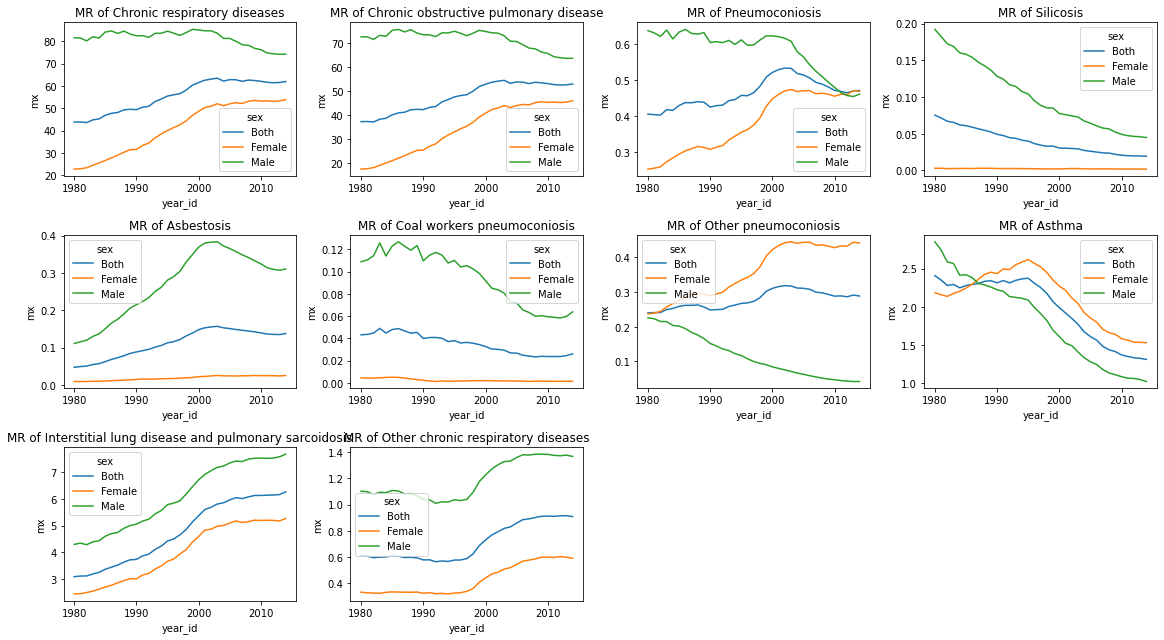

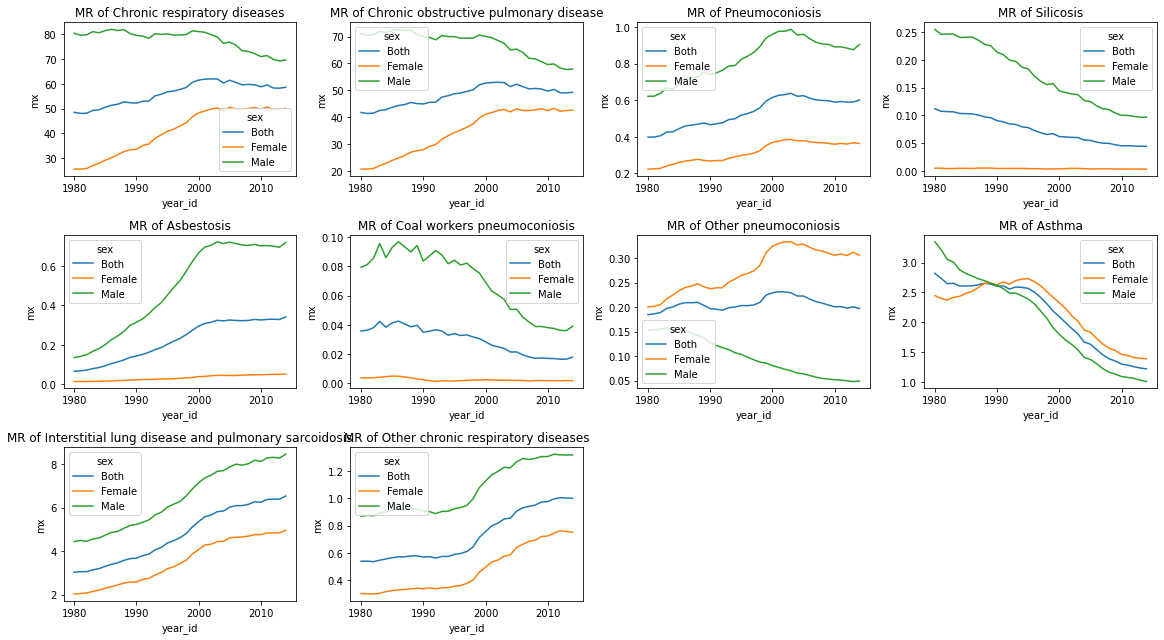

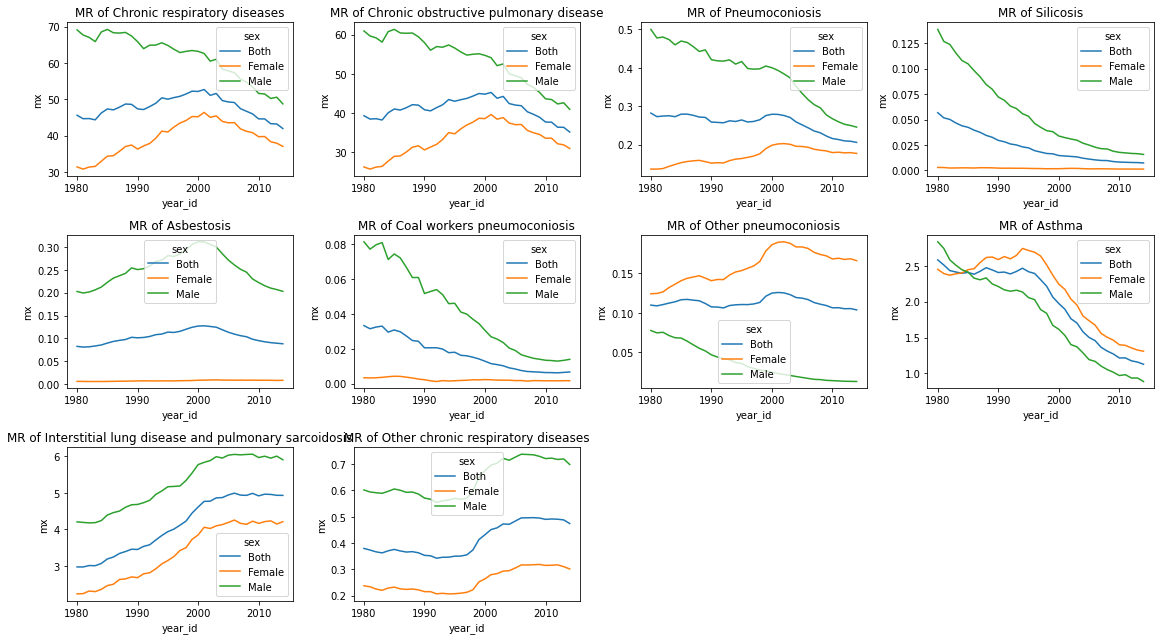

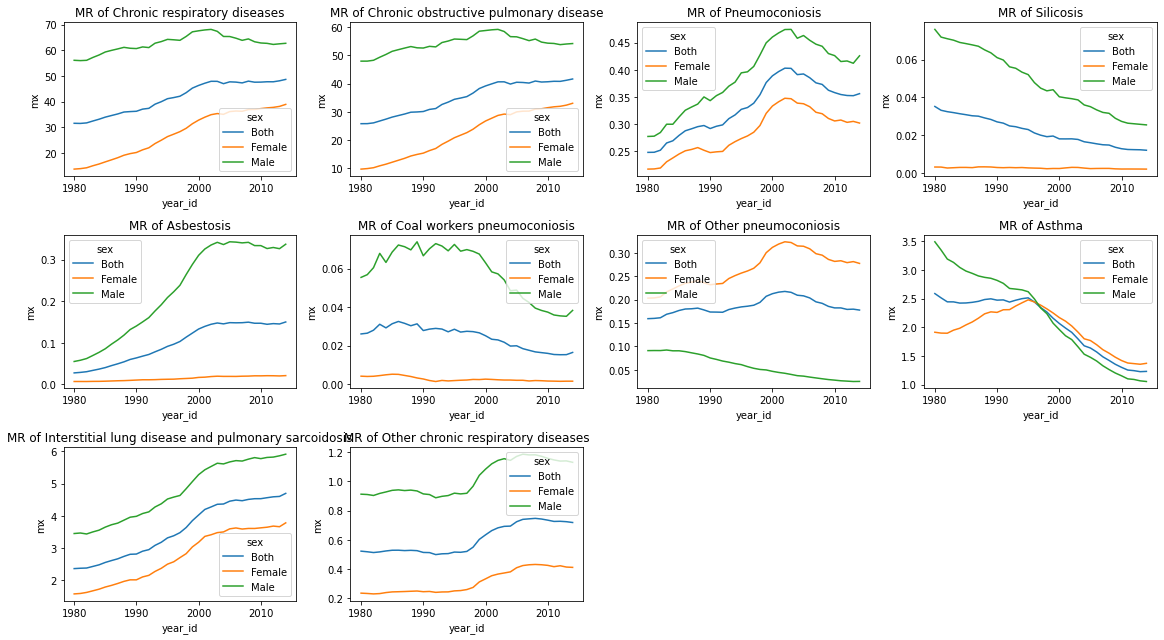

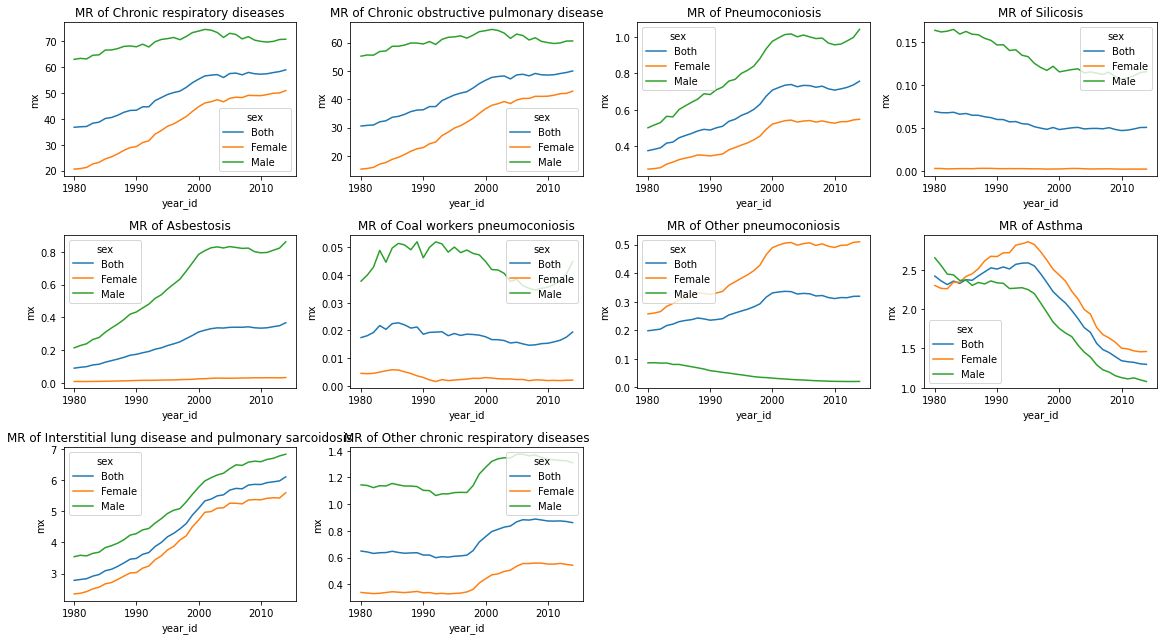

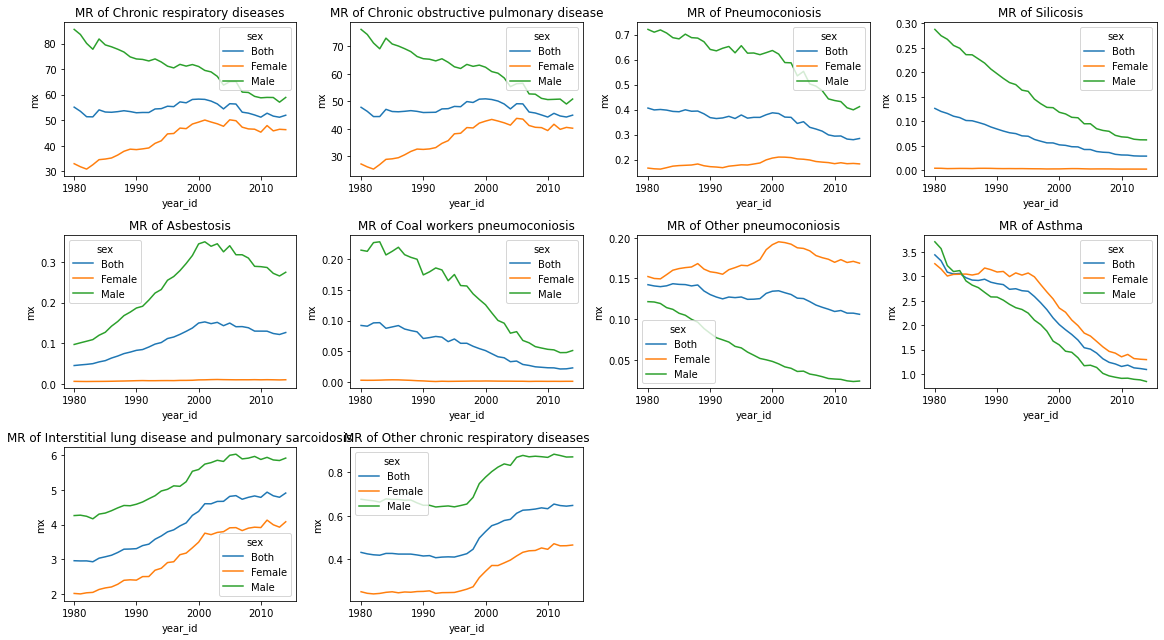

In [7]:
us_chronic_location=us_chronic_resp_disease_use.groupby('location_name')
for i in range(51):
    plot_mx_year_by_cause(us_chronic_location.get_group(state[i]),list(us_chronic_resp_disease_use.cause_name.unique()))

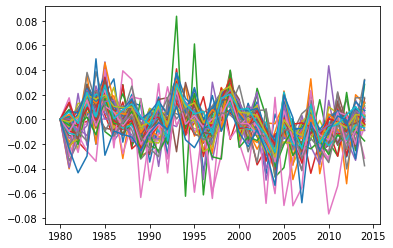

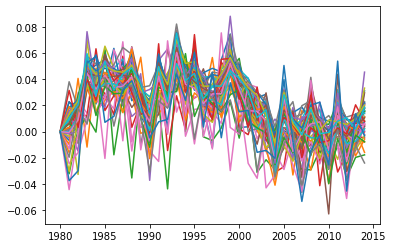

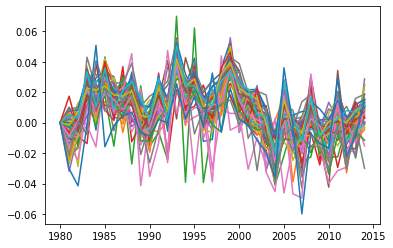

In [23]:
#consider using first order difference, not useful
state_data=us_chronic_location.get_group(state[0])
state_data=state_data[state_data.cause_name=='Chronic respiratory diseases']
first_order_diff=pd.DataFrame(columns=state)
first_order_diff['year_id']=state_data.year_id
first_order_diff['sex']=state_data.sex
for i in range(51):
    state_data=us_chronic_location.get_group(state[i])
    state_data=state_data[state_data.cause_name=='Chronic respiratory diseases']
    if list(state_data.location_name.unique())==['District of Columbia']:
        state_data=state_data[state_data.FIPS==11]
    state_data['first_order_diff']=0
    state_data.loc[state_data.sex=='Male','first_order_diff']=(state_data['mx'][state_data.sex=='Male']
                                                            -state_data['mx'][state_data.sex=='Male'].shift(1))/state_data['mx'][state_data.sex=='Male']
    state_data.loc[state_data.sex=='Female','first_order_diff']=(state_data['mx'][state_data.sex=='Female']
                                                            -state_data['mx'][state_data.sex=='Female'].shift(1))/state_data['mx'][state_data.sex=='Female']
    state_data.loc[state_data.sex=='Both','first_order_diff']=(state_data['mx'][state_data.sex=='Both']
                                                            -state_data['mx'][state_data.sex=='Both'].shift(1))/state_data['mx'][state_data.sex=='Both']
    state_data['first_order_diff']=state_data['first_order_diff'].fillna(0)
    state_data=state_data.reset_index()
    first_order_diff[state[i]]=state_data['first_order_diff'].values
for i in range(51):
    plt.plot(first_order_diff.loc[first_order_diff.sex=='Male','year_id'],first_order_diff.loc[first_order_diff.sex=='Male',state[i]])    
plt.show()
for i in range(51):
    plt.plot(first_order_diff.loc[first_order_diff.sex=='Female','year_id'],first_order_diff.loc[first_order_diff.sex=='Female',state[i]])    
plt.show()
for i in range(51):
    plt.plot(first_order_diff.loc[first_order_diff.sex=='Both','year_id'],first_order_diff.loc[first_order_diff.sex=='Both',state[i]])    
plt.show()

In [22]:
#consider seperate the curve by shape, scale to have same magnitude
state_data=us_chronic_location.get_group(state[0])
state_data=state_data[state_data.cause_name=='Chronic respiratory diseases']
scale_by_magnitude=pd.DataFrame(columns=state)
scale_by_magnitude['year_id']=state_data.year_id
scale_by_magnitude['sex']=state_data.sex    
for i in range(51):
    state_data=us_chronic_location.get_group(state[i])
    state_data=state_data[state_data.cause_name=='Chronic respiratory diseases']
    if list(state_data.location_name.unique())==['District of Columbia']:
        state_data=state_data[state_data.FIPS==11]
    state_data['scale_by_magnitude']=0
    state_data.loc[state_data.sex=='Male','scale_by_magnitude']=(state_data['mx'][state_data.sex=='Male']
                                                            /state_data['mx'][state_data.sex=='Male'].iloc[0])
    state_data.loc[state_data.sex=='Female','scale_by_magnitude']=(state_data['mx'][state_data.sex=='Female']
                                                            /state_data['mx'][state_data.sex=='Female'].iloc[0])
    state_data.loc[state_data.sex=='Both','scale_by_magnitude']=(state_data['mx'][state_data.sex=='Both']
                                                            /state_data['mx'][state_data.sex=='Both'].iloc[0])
    state_data['scale_by_magnitude']=state_data['scale_by_magnitude'].fillna(0)
    state_data=state_data.reset_index()
    scale_by_magnitude[state[i]]=state_data['scale_by_magnitude'].values
    

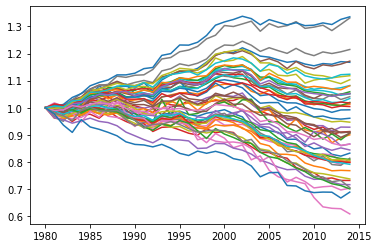

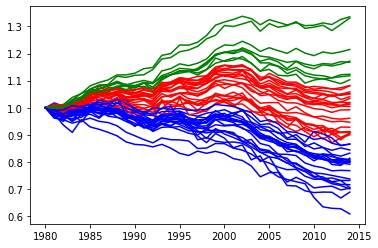

In [27]:
#decide to seperate into 3 clusters, using kmeans (Male)
for i in range(51):
   plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Male','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Male',state[i]])
plt.show()
from sklearn.cluster import KMeans
X_male=np.asmatrix(scale_by_magnitude[scale_by_magnitude['sex']=='Male'].iloc[:,0:51])    
X_male=X_male.transpose()    
kmeans_male = KMeans(n_clusters=3, random_state=0).fit(X_male)
kmeans_male.labels_
for i in range(51):
    if kmeans_male.labels_[i]==0:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Male','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Male',state[i]],c='r')
    elif kmeans_male.labels_[i]==1:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Male','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Male',state[i]],c='b')
    elif kmeans_male.labels_[i]==2:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Male','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Male',state[i]],c='g')
plt.show()

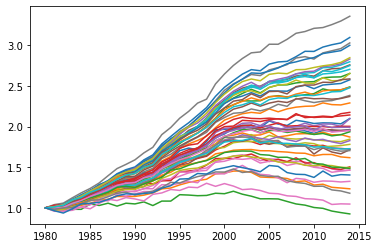

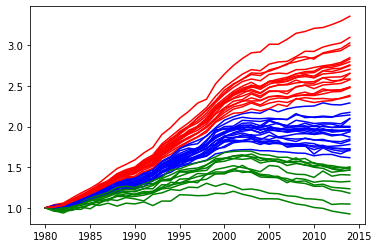

In [28]:
#female    
for i in range(51):
    plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Female','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Female',state[i]])     
plt.show()
X_female=np.asmatrix(scale_by_magnitude[scale_by_magnitude['sex']=='Female'].iloc[:,0:51])    
X_female=X_female.transpose()    
kmeans_female = KMeans(n_clusters=3, random_state=0).fit(X_female)
kmeans_female.labels_
for i in range(51):
    if kmeans_female.labels_[i]==0:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Female','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Female',state[i]],c='r')
    elif kmeans_female.labels_[i]==1:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Female','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Female',state[i]],c='b')
    elif kmeans_female.labels_[i]==2:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Female','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Female',state[i]],c='g')
plt.show()    

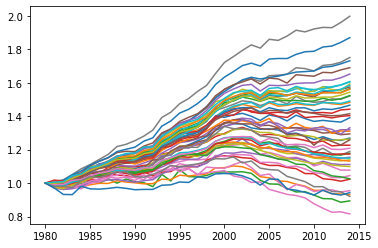

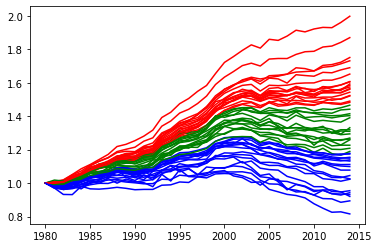

In [29]:
#both
for i in range(51):
   plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Both','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Both',state[i]])     
plt.show()
X_both=np.asmatrix(scale_by_magnitude[scale_by_magnitude['sex']=='Both'].iloc[:,0:51])    
X_both=X_both.transpose()    
kmeans_both = KMeans(n_clusters=3, random_state=0).fit(X_both)
kmeans_both.labels_
for i in range(51):
    if kmeans_both.labels_[i]==0:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Both','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Both',state[i]],c='r')
    elif kmeans_both.labels_[i]==1:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Both','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Both',state[i]],c='b')
    elif kmeans_both.labels_[i]==2:
        plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Both','year_id'],scale_by_magnitude.loc[scale_by_magnitude.sex=='Both',state[i]],c='g')
plt.show()    

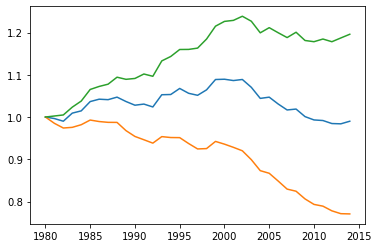

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 103.886
Date:                Thu, 18 Nov 2021   AIC                           -201.772
Time:                        00:26:45   BIC                           -197.106
Sample:                             0   HQIC                          -200.161
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0164      0.043     23.461      0.000       0.931       1.101
ar.L1          0.9329      0.078     11.960      0.000       0.780       1.086
sigma2         0.0001   3.93e-05      3.712      0.0

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params availa

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 109.255
Date:                Thu, 18 Nov 2021   AIC                           -210.509
Time:                        00:26:59   BIC                           -204.288
Sample:                             0   HQIC                          -208.362
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8998      0.094      9.611      0.000       0.716       1.083
ar.L1          1.5452      0.165      9.373      0.000       1.222       1.868
ar.L2         -0.5556      0.170     -3.263      0.0

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  97.329
Date:                Thu, 18 Nov 2021   AIC                           -184.658
Time:                        00:27:06   BIC                           -176.881
Sample:                             0   HQIC                          -181.973
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1196      0.071     15.737      0.000       0.980       1.259
ar.L1          0.5046      0.417      1.209      0.227      -0.313       1.322
ar.L2          0.4676      0.422      1.109      0.2

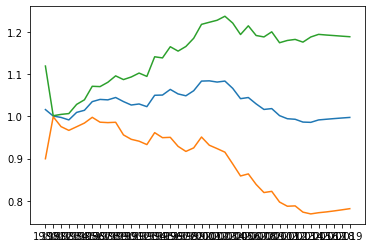

In [30]:
#next we apply arima on the three clusters to forecast
X_male0=X_male[kmeans_male.labels_==0]
X_male1=X_male[kmeans_male.labels_==1]
X_male2=X_male[kmeans_male.labels_==2]
X_male0_mean=np.squeeze(np.asarray(np.mean(X_male0,axis=0)))
X_male1_mean=np.squeeze(np.asarray(np.mean(X_male1,axis=0)))
X_male2_mean=np.squeeze(np.asarray(np.mean(X_male2,axis=0)))
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Male','year_id'],X_male0_mean)     
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Male','year_id'],X_male1_mean)   
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Male','year_id'],X_male2_mean)
plt.show()
import statsmodels.api as sm
res_maleselect0 = sm.tsa.arma_order_select_ic(X_male0_mean, ic=["bic"])
model_male_0=sm.tsa.arima.ARIMA(X_male0_mean,order=(res_maleselect0.bic_min_order[0],0,
                                                          res_maleselect0.bic_min_order[1]))
res_male_0=model_male_0.fit()
print(res_male_0.summary())
res_forecast_male0=res_male_0.forecast(5)

res_maleselect1 = sm.tsa.arma_order_select_ic(X_male1_mean, ic=["bic"])
model_male_1=sm.tsa.arima.ARIMA(X_male1_mean,order=(res_maleselect1.bic_min_order[0],0,
                                                          res_maleselect1.bic_min_order[1]))
res_male_1=model_male_1.fit()
print(res_male_1.summary())
res_forecast_male1=res_male_1.forecast(5)

res_maleselect2 = sm.tsa.arma_order_select_ic(X_male2_mean, ic=["bic"])
model_male_2=sm.tsa.arima.ARIMA(X_male2_mean,order=(res_maleselect2.bic_min_order[0],0,
                                                          res_maleselect2.bic_min_order[1]))
res_male_2=model_male_2.fit()
print(res_male_2.summary())
res_forecast_male2=res_male_2.forecast(5)  

x_axis=list(scale_by_magnitude.loc[scale_by_magnitude.sex=='Male','year_id'])+['2015','2016','2017','2018','2019']  
plt.plot(x_axis,list(res_male_0.fittedvalues)+(list(res_forecast_male0)))     
plt.plot(x_axis,list(res_male_1.fittedvalues)+(list(res_forecast_male1)))   
plt.plot(x_axis,list(res_male_2.fittedvalues)+(list(res_forecast_male2)))
plt.show()

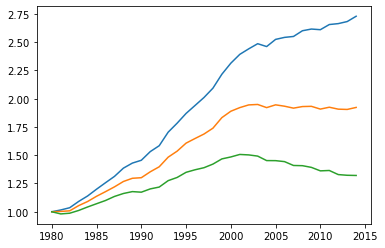

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                      

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  70.572
Date:                Thu, 18 Nov 2021   AIC                           -131.143
Time:                        00:28:06   BIC                           -123.366
Sample:                             0   HQIC                          -128.459
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3133      1.248      1.854      0.064      -0.132       4.759
ar.L1          1.9510      0.036     53.992      0.000       1.880       2.022
ar.L2         -0.9528      0.036    -26.281      0.0

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                      

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  79.692
Date:                Thu, 18 Nov 2021   AIC                           -149.385
Time:                        00:28:14   BIC                           -141.608
Sample:                             0   HQIC                          -146.700
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5394      0.160      9.642      0.000       1.226       1.852
ar.L1          1.9647      0.030     65.948      0.000       1.906       2.023
ar.L2         -0.9740      0.031    -31.840      0.0

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  89.388
Date:                Thu, 18 Nov 2021   AIC                           -168.776
Time:                        00:28:20   BIC                           -160.999
Sample:                             0   HQIC                          -166.092
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2583      0.057     22.087      0.000       1.147       1.370
ar.L1          1.9504      0.036     54.399      0.000       1.880       2.021
ar.L2         -0.9673      0.035    -27.585      0.0

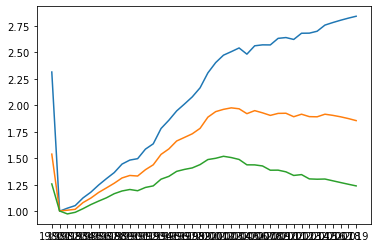

In [31]:
#next we apply arima on the three clusters to forecast
X_female0=X_female[kmeans_female.labels_==0]
X_female1=X_female[kmeans_female.labels_==1]
X_female2=X_female[kmeans_female.labels_==2]
X_female0_mean=np.squeeze(np.asarray(np.mean(X_female0,axis=0)))
X_female1_mean=np.squeeze(np.asarray(np.mean(X_female1,axis=0)))
X_female2_mean=np.squeeze(np.asarray(np.mean(X_female2,axis=0)))
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Female','year_id'],X_female0_mean)     
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Female','year_id'],X_female1_mean)   
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Female','year_id'],X_female2_mean)
plt.show()
import statsmodels.api as sm
res_femaleselect0 = sm.tsa.arma_order_select_ic(X_female0_mean, ic=["bic"])
model_female_0=sm.tsa.arima.ARIMA(X_female0_mean,order=(res_femaleselect0.bic_min_order[0],0,
                                                          res_femaleselect0.bic_min_order[1]))
res_female_0=model_female_0.fit()
print(res_female_0.summary())
res_forecast_female0=res_female_0.forecast(5)

res_femaleselect1 = sm.tsa.arma_order_select_ic(X_female1_mean, ic=["bic"])
model_female_1=sm.tsa.arima.ARIMA(X_female1_mean,order=(res_femaleselect1.bic_min_order[0],0,
                                                          res_femaleselect1.bic_min_order[1]))
res_female_1=model_female_1.fit()
print(res_female_1.summary())
res_forecast_female1=res_female_1.forecast(5)

res_femaleselect2 = sm.tsa.arma_order_select_ic(X_female2_mean, ic=["bic"])
model_female_2=sm.tsa.arima.ARIMA(X_female2_mean,order=(res_femaleselect2.bic_min_order[0],0,
                                                          res_femaleselect2.bic_min_order[1]))
res_female_2=model_female_2.fit()
print(res_female_2.summary())
res_forecast_female2=res_female_2.forecast(5)  

x_axis=list(scale_by_magnitude.loc[scale_by_magnitude.sex=='Female','year_id'])+['2015','2016','2017','2018','2019']  
plt.plot(x_axis,list(res_female_0.fittedvalues)+(list(res_forecast_female0)))     
plt.plot(x_axis,list(res_female_1.fittedvalues)+(list(res_forecast_female1)))   
plt.plot(x_axis,list(res_female_2.fittedvalues)+(list(res_forecast_female2)))
plt.show()

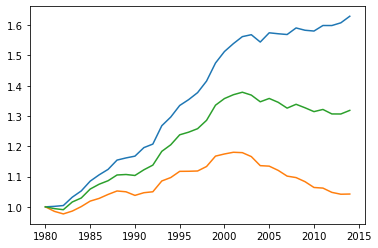

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  76.298
Date:                Thu, 18 Nov 2021   AIC                           -142.597
Time:                        00:28:45   BIC                           -134.820
Sample:                             0   HQIC                          -139.912
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3479      0.422      3.193      0.001       0.521       2.175
ar.L1          0.1348      0.725      0.186      0.853      -1.287       1.557
ar.L2          0.8548      0.733      1.166      0.2

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 104.941
Date:                Thu, 18 Nov 2021   AIC                           -199.883
Time:                        00:28:51   BIC                           -192.106
Sample:                             0   HQIC                          -197.198
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0789      0.013     81.882      0.000       1.053       1.105
ar.L1          1.9559      0.037     52.612      0.000       1.883       2.029
ar.L2         -0.9869      0.035    -27.903      0.0

C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\YuantaoShi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  94.657
Date:                Thu, 18 Nov 2021   AIC                           -179.313
Time:                        00:28:58   BIC                           -171.537
Sample:                             0   HQIC                          -176.629
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2002      0.072     16.569      0.000       1.058       1.342
ar.L1          1.9266      0.074     25.904      0.000       1.781       2.072
ar.L2         -0.9380      0.076    -12.377      0.0

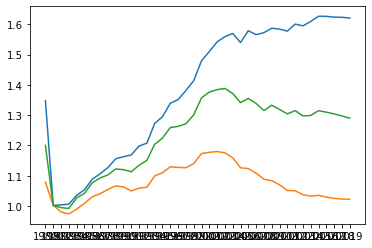

In [32]:
#next we apply arima on the three clusters to forecast
X_both0=X_both[kmeans_both.labels_==0]
X_both1=X_both[kmeans_both.labels_==1]
X_both2=X_both[kmeans_both.labels_==2]
X_both0_mean=np.squeeze(np.asarray(np.mean(X_both0,axis=0)))
X_both1_mean=np.squeeze(np.asarray(np.mean(X_both1,axis=0)))
X_both2_mean=np.squeeze(np.asarray(np.mean(X_both2,axis=0)))
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Both','year_id'],X_both0_mean)     
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Both','year_id'],X_both1_mean)   
plt.plot(scale_by_magnitude.loc[scale_by_magnitude.sex=='Both','year_id'],X_both2_mean)
plt.show()
import statsmodels.api as sm
res_bothselect0 = sm.tsa.arma_order_select_ic(X_both0_mean, ic=["bic"])
model_both_0=sm.tsa.arima.ARIMA(X_both0_mean,order=(res_bothselect0.bic_min_order[0],0,
                                                          res_bothselect0.bic_min_order[1]))
res_both_0=model_both_0.fit()
print(res_both_0.summary())
res_forecast_both0=res_both_0.forecast(5)

res_bothselect1 = sm.tsa.arma_order_select_ic(X_both1_mean, ic=["bic"])
model_both_1=sm.tsa.arima.ARIMA(X_both1_mean,order=(res_bothselect1.bic_min_order[0],0,
                                                          res_bothselect1.bic_min_order[1]))
res_both_1=model_both_1.fit()
print(res_both_1.summary())
res_forecast_both1=res_both_1.forecast(5)

res_bothselect2 = sm.tsa.arma_order_select_ic(X_both2_mean, ic=["bic"])
model_both_2=sm.tsa.arima.ARIMA(X_both2_mean,order=(res_bothselect2.bic_min_order[0],0,
                                                          res_bothselect2.bic_min_order[1]))
res_both_2=model_both_2.fit()
print(res_both_2.summary())
res_forecast_both2=res_both_2.forecast(5)  

x_axis=list(scale_by_magnitude.loc[scale_by_magnitude.sex=='Both','year_id'])+['2015','2016','2017','2018','2019']  
plt.plot(x_axis,list(res_both_0.fittedvalues)+(list(res_forecast_both0)))     
plt.plot(x_axis,list(res_both_1.fittedvalues)+(list(res_forecast_both1)))   
plt.plot(x_axis,list(res_both_2.fittedvalues)+(list(res_forecast_both2)))
plt.show()